In [13]:
pwd

'/System/Volumes/Data/srv/zatserkl/work/JupyterWork/Kolmogorov-Smirnov'

# The Kolmogorov-Smirnov Test to compare two sample distributions

Modified https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5 

In [18]:
%matplotlib inline

import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

In [15]:
2**16

65536

In [2]:
# https://gist.github.com/vinyluis

def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

def ks_norm(sample):
    # Sorts the sample
    sample.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)

    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [3]:
# Scratch from the book Data Science from Scratch

import random

extreme_value_count = 0

for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))  # Count # of heads in 1000 flips

    if num_heads >= 530 or num_heads <= 470:                                 # count how often the # is 'extreme'
        extreme_value_count += 1

print(f'extreme_value_count: {extreme_value_count}')

# p-value was 0.062 => ~62 extreme values out of 1000
assert 59 < extreme_value_count < 65, f"{extreme_value_count}"

extreme_value_count: 63


In [ ]:
# Scratch from the book Data Science from Scratch

import random

extreme_value_count = 0

for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))  # Count # of heads in 1000 flips

    if num_heads >= 530 or num_heads <= 470:                                 # count how often the # is 'extreme'
        extreme_value_count += 1

print(f'extreme_value_count: {extreme_value_count}')

# p-value was 0.062 => ~62 extreme values out of 1000
assert 59 < extreme_value_count < 65, f"{extreme_value_count}"

extreme_value_count: 50


AssertionError: 50

In [11]:
# Normal CDF for 5%

N = 1000
n = 530          # the number of heads
# n = 529.5
n = 500
n = 470

print(f'stats.norm.cdf({n} / {N}): {stats.norm.cdf(n / N, 1/2)}')

stats.norm.cdf(470 / 1000): 0.48803352658588733


In [36]:
N = 1000

n = 530          # the number of heads
n = 500
n = 529.5
n = 530
# n = 531

p = 0.5

loc = N * p
scale = np.sqrt(N * 0.5 * (1 - 0.5))
print(f'loc: {loc}, scale: {scale}')

cdf_val = stats.norm.cdf(n, loc, scale)

print(f'cdf_val: {cdf_val}')
print(f'1 - cdf_val: {1 - cdf_val}')

loc: 500.0, scale: 15.811388300841896
cdf_val: 0.9711102144382013
1 - cdf_val: 0.028889785561798664


In [39]:
N = 1000

n = 530          # the number of heads
n = 500
n = 529.5
n = 530
# n = 531
n = 470

p = 0.5

loc = N * p
scale = np.sqrt(N * 0.5 * (1 - 0.5))
print(f'loc: {loc}, scale: {scale}')

cdf_val = stats.norm.cdf(n, loc, scale)

print(f'cdf_val for {n}: {cdf_val}')
print(f'1 - cdf_val: {1 - cdf_val}')

loc: 500.0, scale: 15.811388300841896
cdf_val for 470: 0.028889785561798623
1 - cdf_val: 0.9711102144382013


In [1]:
pwd

'/System/Volumes/Data/srv/zatserkl/work/JupyterWork/Kolmogorov-Smirnov'

In [8]:
import sys
sys.path.append('/Users/zatserkl/Books GitHub/data-science-from-scratch')

import scratch.probability

In [9]:

from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """Returns mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

from scratch.probability import normal_cdf
# from probability import normal_cdf

# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float,
                             mu: float = 0,
                             sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is greater than lo."""
    return 1 - normal_cdf(lo, mu, sigma)

# It's between if it's less than hi, but not less than lo.
def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is between lo and hi."""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# It's outside if it's not between
def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is not between lo and hi."""
    return 1 - normal_probability_between(lo, hi, mu, sigma)

from scratch.probability import inverse_normal_cdf

def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
    """
    Returns the symmetric (about the mean) bounds
    that contain the specified probability
    """
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

In [12]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(f'mu_0: {mu_0}, sigma_0: {sigma_0}')

mu_0: 500.0, sigma_0: 15.811388300841896


In [14]:
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(f'lower_bound: {lower_bound}, upper_bound: {upper_bound}')

# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability      # 0.887
print(f'power in two-sided test: {power}')

# one-sided test: the coin is not biased toward heads: p <= 0.5

hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability      # 0.936
print(f'power in one-sided test: {power}')

lower_bound: 469.01026640487555, upper_bound: 530.9897335951244
power in two-sided test: 0.8865480012953671
power in one-sided test: 0.9363794803307173


In [167]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(f'mu_0: {mu_0}, sigma_0: {sigma_0}')

p1 = normal_probability_between(529.5, 530.5, mu_0, sigma_0)
print(f'normal_probability_between(529.5, 530.5, mu_0, sigma_0): {p1}')

p2 = normal_probability_between(530, 531, mu_0, sigma_0)
print(f'normal_probability_between(530, 531, mu_0, sigma_0): {p2}')

mu_0: 500.0, sigma_0: 15.811388300841896
normal_probability_between(529.5, 530.5, mu_0, sigma_0): 0.004172517118902541
normal_probability_between(530, 531, mu_0, sigma_0): 0.003927643541949966


In [16]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    How likely are we to see a value at least as extreme as x (in either
    direction) if our values are from a N(mu, sigma)?
    """
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)

p_two_sided = two_sided_p_value(529.5, mu_0, sigma_0)   # 0.062
print(f'p_two_sided: {p_two_sided}')

p_two_sided: 0.06207721579598835


In [ ]:
# compare with normal cdf
# (sure, that function uses the normal cdf, but I would like to use my direct method)





In [20]:
N = 1000

n = 530          # the number of heads
# n = 500
# n = 529.5
# n = 530
# # n = 531
# n = 470

# About Continuity Correction
#
# def normal_probability_above(lo: float,
#                              mu: float = 0,
#                              sigma: float = 1) -> float:
#     """The probability that a N(mu, sigma) is greater than lo."""
#     return 1 - normal_cdf(lo, mu, sigma)
#
#  We would like to get a Normal probability to have 530 or higher


n = 529.5  # take the Normal value in the left (lower) value of the bin 530

p = 0.5

loc = N * p
scale = np.sqrt(N * 0.5 * (1 - 0.5))
print(f'loc: {loc}, scale: {scale}')

cdf_val = stats.norm.cdf(n, loc, scale)

print(f'cdf_val for {n}: {cdf_val}')
print(f'1 - cdf_val: {1 - cdf_val}')

loc: 500.0, scale: 15.811388300841896
cdf_val for 529.5: 0.9689613921020058
1 - cdf_val: 0.031038607897994175


In [65]:
# simulation of the continuity correction

###############################################
#
#   assert will fail depending on the random
#
###############################################

mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(f'mu_0: {mu_0}, sigma_0: {sigma_0}')

import random

extreme_value_count = 0
for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0    # Count # of heads
                    for _ in range(1000))                # in 1000 flips,
    if num_heads >= 530 or num_heads <= 470:             # and count how often
        extreme_value_count += 1                         # the # is 'extreme'

print(f'extreme_value_count: {extreme_value_count}')

# p-value was 0.062 => ~62 extreme values out of 1000
assert 59 < extreme_value_count < 65, f"{extreme_value_count}"

val = two_sided_p_value(531.5, mu_0, sigma_0)   # 0.0463

print(f'two_sided_p_value(531.5, {mu_0}, {sigma_0}: {val})')

mu_0: 500.0, sigma_0: 15.811388300841896
extreme_value_count: 63
two_sided_p_value(531.5, 500.0, 15.811388300841896: 0.046345287837786575)


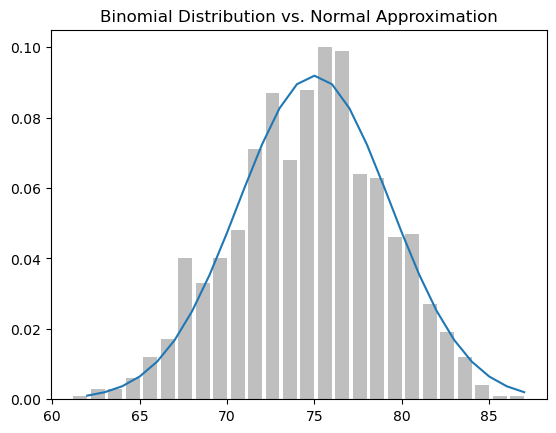

In [72]:
# from scratch.probability

import random

def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

from collections import Counter

def binomial_histogram_1(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
#     plt.show()

# probability.binomial_histogram(0.75, 100, 1000)
binomial_histogram_1(0.75, 100, 1000)

In [75]:
# Plot Bernulli CDF

n = 10
loc = 8
scale = 1
cdf_val = stats.norm.cdf(n, loc, scale)
print(f'n: {n}, loc: {loc}, scale: {scale}, cdf_val = stats.norm.cdf({n}, {loc}, {scale}): {cdf_val}')

p = 0.5
bernoulli_mean, bernoulli_var, bernoulli_skew, bernoulli_kurt = stats.bernoulli.stats(p, moments='mvsk')
print(bernoulli_mean, bernoulli_var, bernoulli_skew, bernoulli_kurt)


n: 10, loc: 8, scale: 1, cdf_val = stats.norm.cdf(10, 8, 1): 0.9772498680518208
0.5 0.25 0.0 -2.0


In [78]:
math.sqrt(1000 * 0.5 * (1 - 0.5))

15.811388300841896

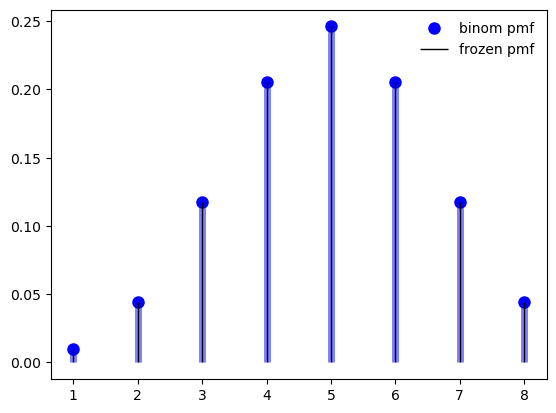

In [83]:
# In fact, I am interested in binomial distribution

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 5, 0.4
n, p = 10, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)  # "freeze" the distribution: fix parameters n and p

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
# plt.show()


In [139]:
print(f'binom.pmf(5.1, n, p): {binom.pmf(5.1, n, p)}')  # 0 for non-integer x
print(f'binom.cdf(5.1, n, p): {binom.cdf(5.1, n, p)}')  # is NOT 0 for non-integer x

binom.pmf(5.1, n, p): 0.0
binom.cdf(5.1, n, p): 0.623046875


mean: 5.0, var: 2.5, skew: 0.0, kurt: -0.2
binom.pmf(5.5, n, p): 0.0 		-- zero for NON-integer x
binom.cdf(5.5, n, p): 0.623046875 	-- NON-zero for NON-integer x


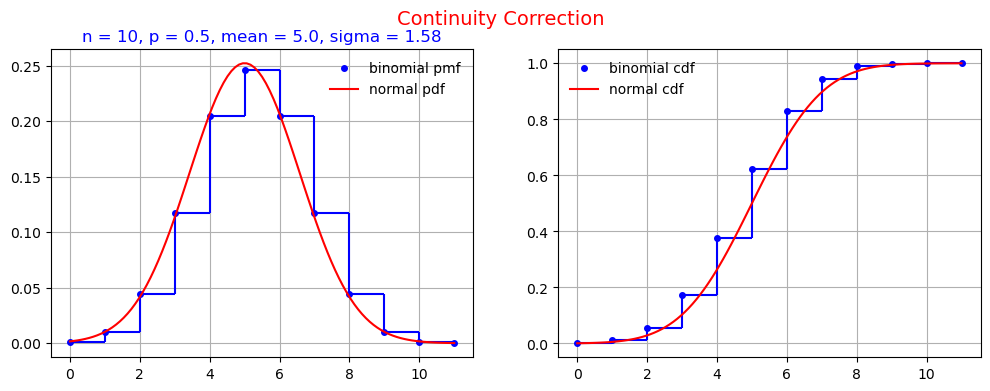

In [166]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

n, p = 10, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(f'mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle(f'Continuity Correction', fontsize=14, color='red')

ax1.set_title(f'n = {n}, p = {p}, mean = {mean}, sigma = {np.sqrt(n * p * (1 - p)):.2f}', color='b')

# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.9999, n, p))
x = np.arange(n+1+1)
# print(f'{x}')

ax1.plot(x, binom.pmf(x, n, p), 'bo', ms=4, label='binomial pmf')
ax1.vlines(x[1:], binom.pmf(x[1:], n, p), binom.pmf(x[:-1], n, p), colors='b')
ax1.hlines(binom.pmf(x[:-1], n, p), x[:-1], x[1:], colors='b')

ax2.plot(x, binom.cdf(x, n, p), 'bo', ms=4, label='binomial cdf')
ax2.vlines(x[1:], binom.cdf(x[1:], n, p), binom.cdf(x[:-1], n, p), colors='b')
ax2.hlines(binom.cdf(x[:-1], n, p), x[:-1], x[1:], colors='b')

normal_x = np.linspace(x[0], x[-1], 100+1)
normal_mu = n * p
normal_sigma = np.sqrt(n * p * (1 - p))

ax1.plot(normal_x, scipy.stats.norm.pdf(normal_x, normal_mu, normal_sigma), 'r', label='normal pdf')
ax2.plot(normal_x, scipy.stats.norm.cdf(normal_x, normal_mu, normal_sigma), 'r', label='normal cdf')

ax1.legend(loc='best', frameon=False)
ax2.legend(loc='best', frameon=False)
ax1.grid()
ax2.grid()

print(f'binom.pmf(5.5, n, p): {binom.pmf(5.1, n, p)} \t\t-- zero for NON-integer x')  # 0 for non-integer x
print(f'binom.cdf(5.5, n, p): {binom.cdf(5.1, n, p)} \t-- NON-zero for NON-integer x')  # is NOT 0 for non-integer x

mean: 5.0, var: 2.5, skew: 0.0, kurt: -0.2
binom.pmf(5.5, n, p): 0.0 		-- zero for NON-integer x
binom.cdf(5.5, n, p): 0.623046875 	-- NON-zero for NON-integer x


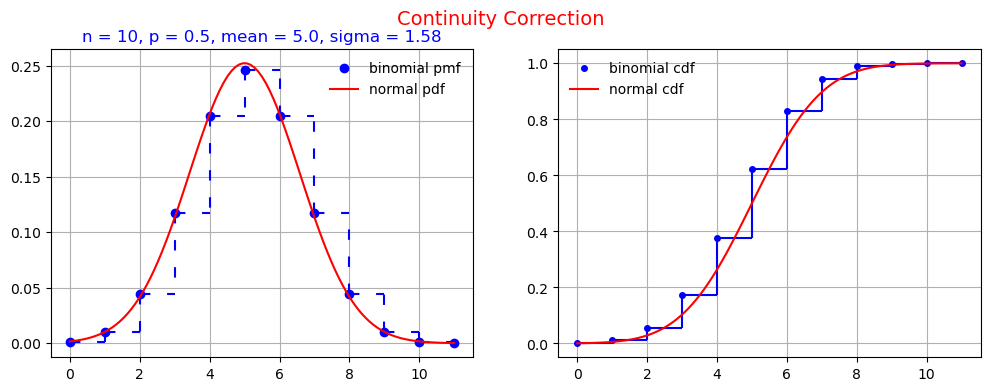

In [186]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

n, p = 10, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(f'mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle(f'Continuity Correction', fontsize=14, color='red')

ax1.set_title(f'n = {n}, p = {p}, mean = {mean}, sigma = {np.sqrt(n * p * (1 - p)):.2f}', color='b')

# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.9999, n, p))
x = np.arange(n+1+1)
# print(f'{x}')

ax1.plot(x, binom.pmf(x, n, p), 'bo', ms=6, label='binomial pmf')
loosely_dotted = (0, (1, 4))
loosely_dashed = (0, (5, 8))
# ax1.vlines(x[1:], binom.pmf(x[1:], n, p), binom.pmf(x[:-1], n, p), colors='b', linestyle=loosely_dotted)
# ax1.hlines(binom.pmf(x[:-1], n, p), x[:-1], x[1:], colors='b', linestyle=loosely_dotted)
ax1.vlines(x[1:], binom.pmf(x[1:], n, p), binom.pmf(x[:-1], n, p), colors='b', linestyle=loosely_dashed)
ax1.hlines(binom.pmf(x[:-1], n, p), x[:-1], x[1:], colors='b', linestyle=loosely_dashed)

ax2.plot(x, binom.cdf(x, n, p), 'bo', ms=4, label='binomial cdf')
ax2.vlines(x[1:], binom.cdf(x[1:], n, p), binom.cdf(x[:-1], n, p), colors='b')
ax2.hlines(binom.cdf(x[:-1], n, p), x[:-1], x[1:], colors='b')

normal_x = np.linspace(x[0], x[-1], 100+1)
normal_mu = n * p
normal_sigma = np.sqrt(n * p * (1 - p))

ax1.plot(normal_x, scipy.stats.norm.pdf(normal_x, normal_mu, normal_sigma), 'r', label='normal pdf')
ax2.plot(normal_x, scipy.stats.norm.cdf(normal_x, normal_mu, normal_sigma), 'r', label='normal cdf')

ax1.legend(loc='best', frameon=False)
ax2.legend(loc='best', frameon=False)
ax1.grid()
ax2.grid()

print(f'binom.pmf(5.5, n, p): {binom.pmf(5.1, n, p)} \t\t-- zero for NON-integer x')  # 0 for non-integer x
print(f'binom.cdf(5.5, n, p): {binom.cdf(5.1, n, p)} \t-- NON-zero for NON-integer x')  # is NOT 0 for non-integer x

In [170]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(f'mu_0: {mu_0}, sigma_0: {sigma_0}')

p1 = normal_probability_between(529.5, 530.5, mu_0, sigma_0)
print(f'normal_probability_between(529.5, 530.5, mu_0, sigma_0): {p1}')

p2 = normal_probability_between(530, 531, mu_0, sigma_0)
print(f'normal_probability_between(530, 531, mu_0, sigma_0): {p2}')

# p_binomial = binom.cdf(530, n, p)
# print(f'\nbinomial for n = {n}, p = {p}: {p_binomial}')
print(f'\nbinom.cdf(530, 1000, 0.5) for n = {n}, p = {p}: {binom.cdf(530, 1000, 0.5)}')
print(f'\n1 - binom.cdf(530, 1000, 0.5) for n = {n}, p = {p}: {1 - binom.cdf(530, 1000, 0.5)}')

mu_0: 500.0, sigma_0: 15.811388300841896
normal_probability_between(529.5, 530.5, mu_0, sigma_0): 0.004172517118902541
normal_probability_between(530, 531, mu_0, sigma_0): 0.003927643541949966

binom.cdf(530, 1000, 0.5) for n = 10, p = 0.5: 0.9731610751774951

1 - binom.cdf(530, 1000, 0.5) for n = 10, p = 0.5: 0.02683892482250494


# Practice

beta1: a1: 7, b1: 10
mean_beta1: 0.412, var_beta1: 0.013, skew_beta1: 0.160, kurt_beta1: -0.263
beta2: a2: 5, b2:10
mean_beta2: 0.333, var_beta2: 0.014, skew_beta2: 0.333, kurt_beta2: -0.176


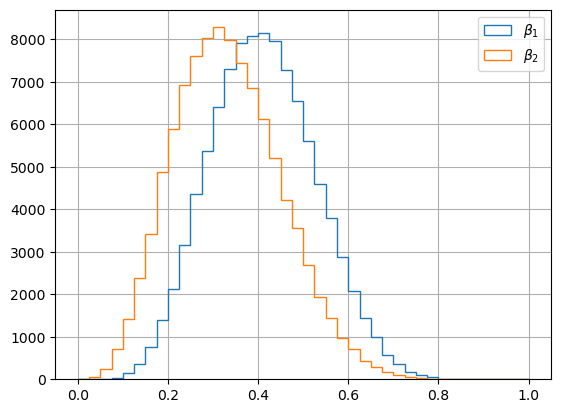

In [2]:
# Create two beta-distributed samples

# https://datascienceinpractice.github.io/tutorials/11-TestingDistributions.html

N = 100_000

a1 = 7
b1 = 10
beta1 = stats.beta.rvs(a1, b1, size=N)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

a2 = 5
b2 = 10
beta2 = stats.beta.rvs(a2, b2, size=N)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:5
mean_beta2: 0.286, var_beta2: 0.026, skew_beta2: 0.596, kurt_beta2: -0.120


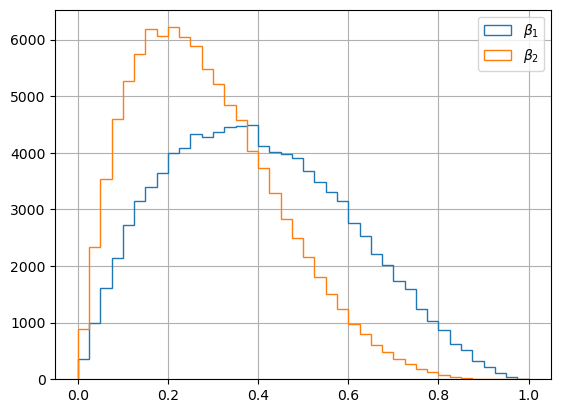

In [3]:
# Create two beta-distributed samples

# https://datascienceinpractice.github.io/tutorials/11-TestingDistributions.html

N = 100_000

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

a2 = 2
b2 = 5
beta2 = stats.beta.rvs(a2, b2, size=N)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:5
mean_beta2: 0.286, var_beta2: 0.026, skew_beta2: 0.596, kurt_beta2: -0.120


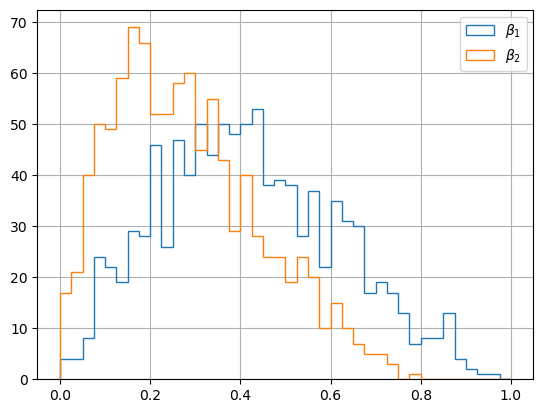

In [4]:
# Create two beta-distributed samples

# https://datascienceinpractice.github.io/tutorials/11-TestingDistributions.html

N = 1000

# scipy.beta.random_state = 1

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

a2 = 2
b2 = 5
beta2 = stats.beta.rvs(a2, b2, size=N)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:5
mean_beta2: 0.286, var_beta2: 0.026, skew_beta2: 0.596, kurt_beta2: -0.120


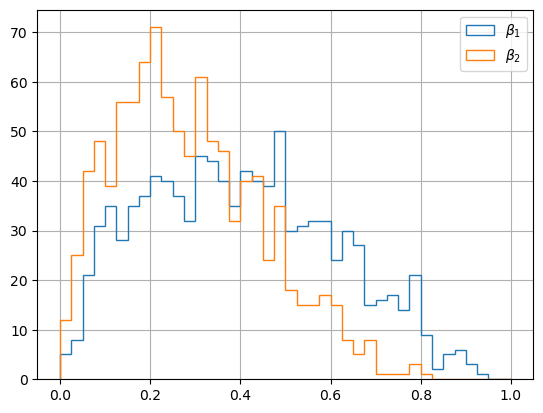

In [5]:
# Create two beta-distributed samples

# https://datascienceinpractice.github.io/tutorials/11-TestingDistributions.html

N = 1000

stats.beta.random_state = 1  # seed

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

a2 = 2
b2 = 5
beta2 = stats.beta.rvs(a2, b2, size=N)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

# Apply the Kolmogorov-Smirnov 2-sample test

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:5
mean_beta2: 0.286, var_beta2: 0.026, skew_beta2: 0.596, kurt_beta2: -0.120


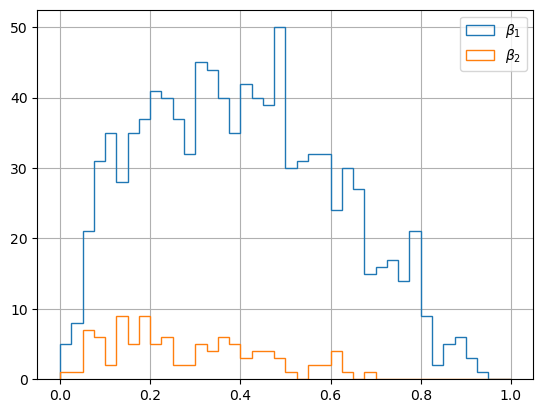

In [6]:
# Create two beta-distributed samples

# https://datascienceinpractice.github.io/tutorials/11-TestingDistributions.html

N1 = 1000  # F1 distribution (known)
N2 = 100   # F2 distribution (to test)

stats.beta.random_state = 1  # seed

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

a2 = 2
b2 = 5
beta2 = stats.beta.rvs(a2, b2, size=N2)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

beta1_std.mean(): 3.1974423109204506e-17, beta2_std.mean(): -4.440892098500626e-18
beta1_std.std(): 1.0, beta2_std.std(): 1.0


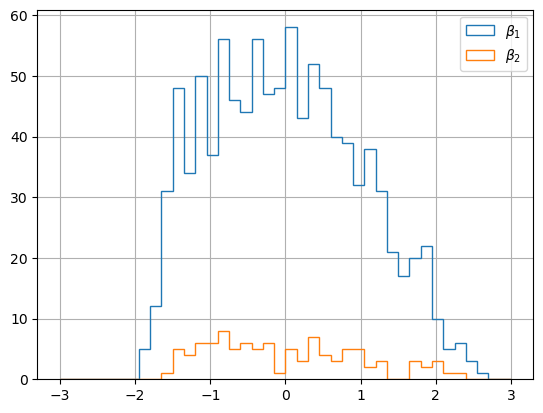

In [7]:
# turn to the standard form: delete a mean and normalize by sigma
beta1_std = (beta1 - beta1.mean()) / beta1.std()
beta2_std = (beta2 - beta2.mean()) / beta2.std()

print(f'beta1_std.mean(): {beta1_std.mean()}, beta2_std.mean(): {beta2_std.mean()}')
print(f'beta1_std.std(): {beta1_std.std()}, beta2_std.std(): {beta2_std.std()}')

bins = np.linspace(-3, 3, 40+1)  # different from non-standartized one
plt.figure()
plt.hist(beta1_std, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2_std, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

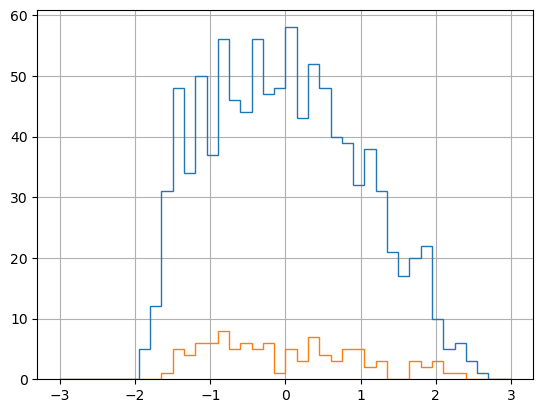

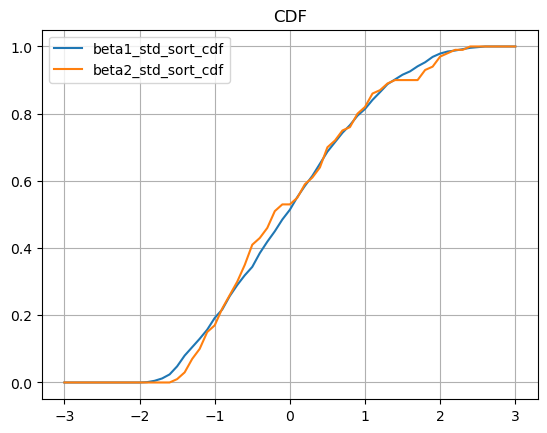

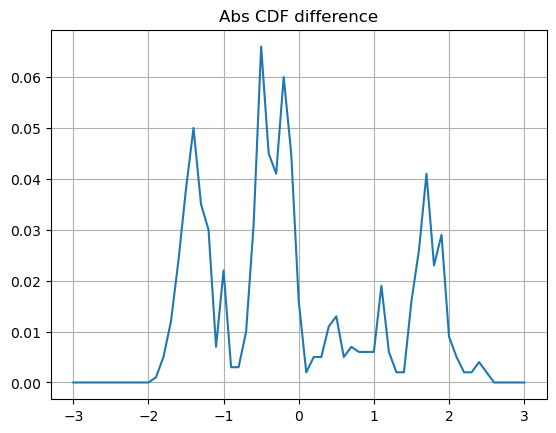

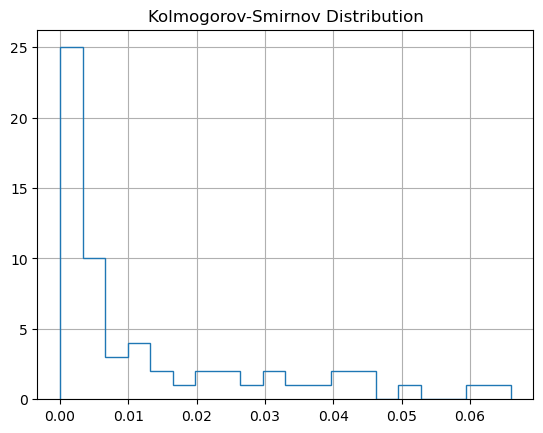

In [10]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        # x_index = bisect.bisect_left(sample, x[i])  # -- what is that???
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

beta1_std_sort = beta1_std[:]
beta1_std_sort.sort()

beta2_std_sort = beta2_std[:]
beta2_std_sort.sort()

bins = np.linspace(-3, 3, 40+1)  # different from non-standartized one
plt.figure()
plt.hist(beta1_std_sort, bins=bins, histtype='step')
plt.hist(beta2_std_sort, bins=bins, histtype='step')
plt.grid()

# what x-values select for the CDF?

x_cdf = np.linspace(-3, 3, 60+1)
beta1_std_sort_cdf = cdf(beta1_std_sort, x_cdf)
beta2_std_sort_cdf = cdf(beta2_std_sort, x_cdf)

plt.figure()
plt.title(f'CDF')
plt.plot(x_cdf, beta1_std_sort_cdf, label='beta1_std_sort_cdf')
plt.plot(x_cdf, beta2_std_sort_cdf, label='beta2_std_sort_cdf')
plt.legend()
plt.grid()

dCDF = np.abs(beta1_std_sort_cdf - beta2_std_sort_cdf)

plt.figure()
plt.title(f'Abs CDF difference')
plt.plot(x_cdf, dCDF)
plt.grid()

plt.figure()
plt.title(f'Kolmogorov-Smirnov Distribution')
plt.hist(dCDF, bins=20, histtype='step')
plt.grid()

# Two samples from the same distribution (Beta Distribution)

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:3
mean_beta2: 0.400, var_beta2: 0.040, skew_beta2: 0.286, kurt_beta2: -0.643
beta1_std.mean(): 3.1974423109204506e-17, beta2_std.mean(): 1.3988810110276973e-16
beta1_std.std(): 1.0, beta2_std.std(): 1.0


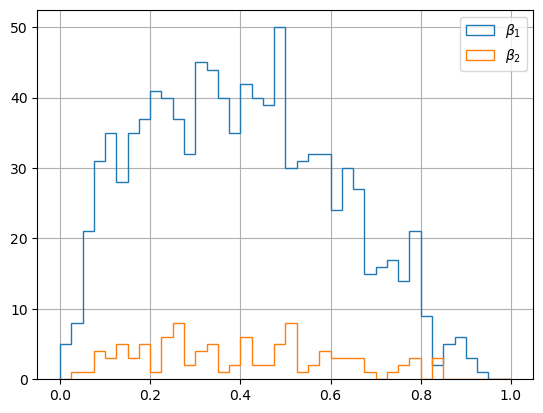

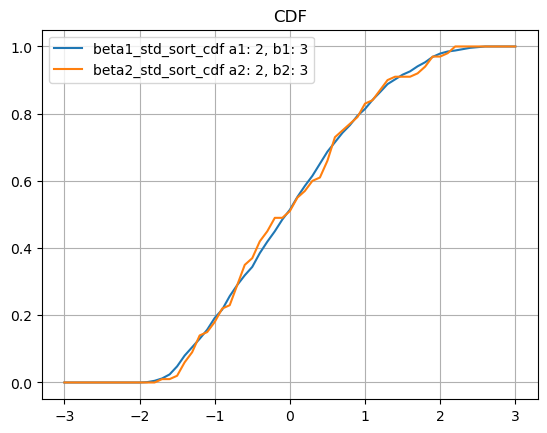

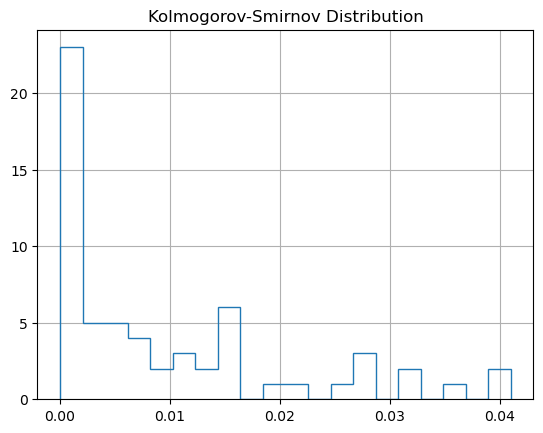

In [11]:
N1 = 1000  # F1 distribution (known)
N2 = 100   # F2 distribution (to test)

stats.beta.random_state = 1  # seed

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

# a2 = 2
# b2 = 5
a2 = a1
b2 = b1
beta2 = stats.beta.rvs(a2, b2, size=N2)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

#
#   Standartize
#

# turn to the standard form: delete a mean and normalize by sigma
beta1_std = (beta1 - beta1.mean()) / beta1.std()
beta2_std = (beta2 - beta2.mean()) / beta2.std()

print(f'beta1_std.mean(): {beta1_std.mean()}, beta2_std.mean(): {beta2_std.mean()}')
print(f'beta1_std.std(): {beta1_std.std()}, beta2_std.std(): {beta2_std.std()}')

# bins = np.linspace(-3, 3, 40+1)  # different from non-standartized one
# plt.figure()
# plt.hist(beta1_std, bins=bins, histtype='step', label=r'$\beta_1$')
# plt.hist(beta2_std, bins=bins, histtype='step', label=r'$\beta_2$')
# plt.legend()
# plt.grid()

#
#   Get the Kolmogorov-Smirnov Distribution (2-sample)
#

def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        # x_index = bisect.bisect_left(sample, x[i])  # -- what is that???
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

beta1_std_sort = beta1_std[:]
beta1_std_sort.sort()

beta2_std_sort = beta2_std[:]
beta2_std_sort.sort()

# what x-values select for the CDF?

x_cdf = np.linspace(-3, 3, 60+1)
beta1_std_sort_cdf = cdf(beta1_std_sort, x_cdf)
beta2_std_sort_cdf = cdf(beta2_std_sort, x_cdf)

plt.figure()
plt.title(f'CDF')
plt.plot(x_cdf, beta1_std_sort_cdf, label=f'beta1_std_sort_cdf a1: {a1}, b1: {b1}')
plt.plot(x_cdf, beta2_std_sort_cdf, label=f'beta2_std_sort_cdf a2: {a2}, b2: {b2}')
plt.legend()
plt.grid()

dCDF = np.abs(beta1_std_sort_cdf - beta2_std_sort_cdf)

# plt.figure()
# plt.title(f'Abs CDF difference')
# plt.plot(x_cdf, dCDF)
# plt.grid()

plt.figure()
plt.title(f'Kolmogorov-Smirnov Distribution')
plt.hist(dCDF, bins=20, histtype='step')
plt.grid()

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:5
mean_beta2: 0.286, var_beta2: 0.026, skew_beta2: 0.596, kurt_beta2: -0.120
beta1_std.mean(): 3.1974423109204506e-17, beta2_std.mean(): -4.440892098500626e-18
beta1_std.std(): 1.0, beta2_std.std(): 1.0


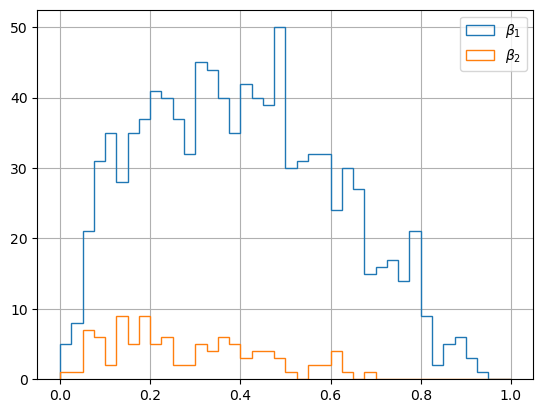

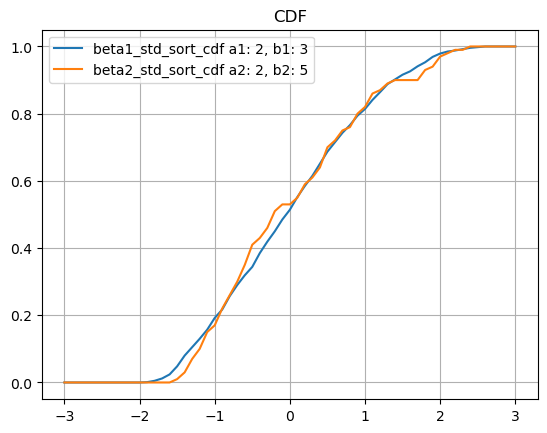

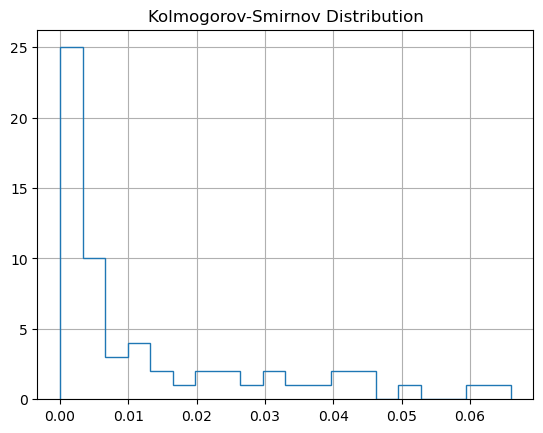

In [12]:
N1 = 1000  # F1 distribution (known)
N2 = 100   # F2 distribution (to test)

stats.beta.random_state = 1  # seed

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

a2 = 2
b2 = 5
# a2 = a1
# b2 = b1
beta2 = stats.beta.rvs(a2, b2, size=N2)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

#
#   Standartize
#

# turn to the standard form: delete a mean and normalize by sigma
beta1_std = (beta1 - beta1.mean()) / beta1.std()
beta2_std = (beta2 - beta2.mean()) / beta2.std()

print(f'beta1_std.mean(): {beta1_std.mean()}, beta2_std.mean(): {beta2_std.mean()}')
print(f'beta1_std.std(): {beta1_std.std()}, beta2_std.std(): {beta2_std.std()}')

# bins = np.linspace(-3, 3, 40+1)  # different from non-standartized one
# plt.figure()
# plt.hist(beta1_std, bins=bins, histtype='step', label=r'$\beta_1$')
# plt.hist(beta2_std, bins=bins, histtype='step', label=r'$\beta_2$')
# plt.legend()
# plt.grid()

#
#   Get the Kolmogorov-Smirnov Distribution (2-sample)
#

def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        # x_index = bisect.bisect_left(sample, x[i])  # -- what is that???
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

beta1_std_sort = beta1_std[:]
beta1_std_sort.sort()

beta2_std_sort = beta2_std[:]
beta2_std_sort.sort()

# what x-values select for the CDF?

x_cdf = np.linspace(-3, 3, 60+1)
beta1_std_sort_cdf = cdf(beta1_std_sort, x_cdf)
beta2_std_sort_cdf = cdf(beta2_std_sort, x_cdf)

plt.figure()
plt.title(f'CDF')
plt.plot(x_cdf, beta1_std_sort_cdf, label=f'beta1_std_sort_cdf a1: {a1}, b1: {b1}')
plt.plot(x_cdf, beta2_std_sort_cdf, label=f'beta2_std_sort_cdf a2: {a2}, b2: {b2}')
plt.legend()
plt.grid()

dCDF = np.abs(beta1_std_sort_cdf - beta2_std_sort_cdf)

# plt.figure()
# plt.title(f'Abs CDF difference')
# plt.plot(x_cdf, dCDF)
# plt.grid()

plt.figure()
plt.title(f'Kolmogorov-Smirnov Distribution')
plt.hist(dCDF, bins=20, histtype='step')
plt.grid()

## Beautefy the code
### (Case of the same distributions)

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:5
mean_beta2: 0.286, var_beta2: 0.026, skew_beta2: 0.596, kurt_beta2: -0.120
beta1_std.mean(): 3.1974423109204506e-17, beta2_std.mean(): 6.750155989720952e-17
beta1_std.std(): 1.0, beta2_std.std(): 0.9999999999999999


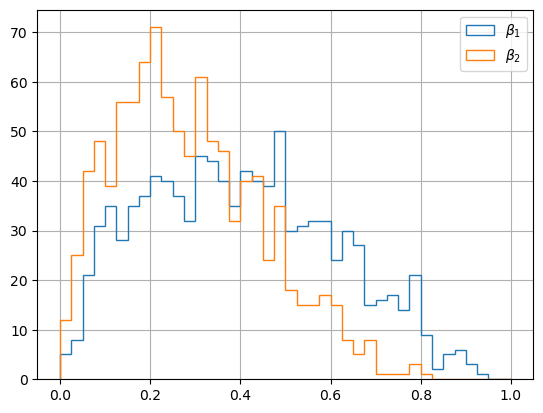

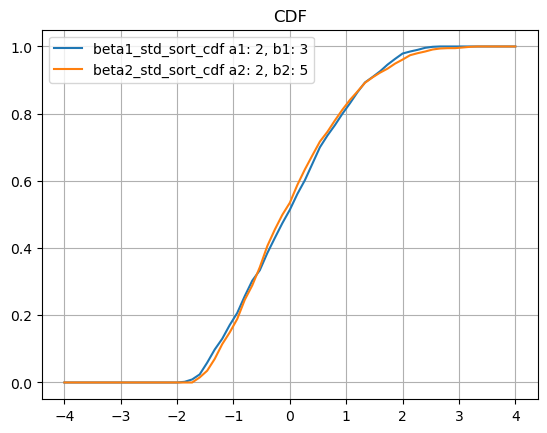

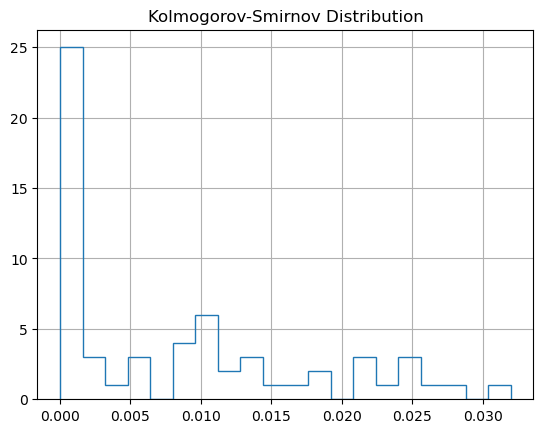

In [13]:
N1 = 1000  # F1 distribution (known)
# N2 = 100   # F2 distribution (to test)
N2 = 1000   # F2 distribution (to test)

stats.beta.random_state = 1  # seed

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

a2 = 2
b2 = 5
# a2 = a1
# b2 = b1
beta2 = stats.beta.rvs(a2, b2, size=N2)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

#
#   Standartize
#

# turn to the standard form: delete a mean and normalize by sigma
beta1_std = (beta1 - beta1.mean()) / beta1.std()
beta2_std = (beta2 - beta2.mean()) / beta2.std()

print(f'beta1_std.mean(): {beta1_std.mean()}, beta2_std.mean(): {beta2_std.mean()}')
print(f'beta1_std.std(): {beta1_std.std()}, beta2_std.std(): {beta2_std.std()}')

# bins = np.linspace(-3, 3, 40+1)  # different from non-standartized one
# plt.figure()
# plt.hist(beta1_std, bins=bins, histtype='step', label=r'$\beta_1$')
# plt.hist(beta2_std, bins=bins, histtype='step', label=r'$\beta_2$')
# plt.legend()
# plt.grid()

#
#   Get the Kolmogorov-Smirnov Distribution (2-sample)
#

def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        # x_index = bisect.bisect_left(sample, x[i])  # -- what is that???
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

beta1_std_sort = beta1_std[:]
beta1_std_sort.sort()

beta2_std_sort = beta2_std[:]
beta2_std_sort.sort()

# what x-values select for the CDF?

x_cdf_max = 4
x_cdf = np.linspace(-x_cdf_max, x_cdf_max, 60+1)
beta1_std_sort_cdf = cdf(beta1_std_sort, x_cdf)
beta2_std_sort_cdf = cdf(beta2_std_sort, x_cdf)

plt.figure()
plt.title(f'CDF')
plt.plot(x_cdf, beta1_std_sort_cdf, label=f'beta1_std_sort_cdf a1: {a1}, b1: {b1}')
plt.plot(x_cdf, beta2_std_sort_cdf, label=f'beta2_std_sort_cdf a2: {a2}, b2: {b2}')
plt.legend()
plt.grid()

dCDF = np.abs(beta1_std_sort_cdf - beta2_std_sort_cdf)

# plt.figure()
# plt.title(f'Abs CDF difference')
# plt.plot(x_cdf, dCDF)
# plt.grid()

plt.figure()
plt.title(f'Kolmogorov-Smirnov Distribution')
plt.hist(dCDF, bins=20, histtype='step')
plt.grid()

# Build the correct Kolmogorov-Smirnov distribution: 
## the distribution of the max diffence of the CDFs

beta1: a1: 2, b1: 3
mean_beta1: 0.400, var_beta1: 0.040, skew_beta1: 0.286, kurt_beta1: -0.643
beta2: a2: 2, b2:3
mean_beta2: 0.400, var_beta2: 0.040, skew_beta2: 0.286, kurt_beta2: -0.643
xmin: -1, xmax: 2
max_diff: 0.01899999999999999


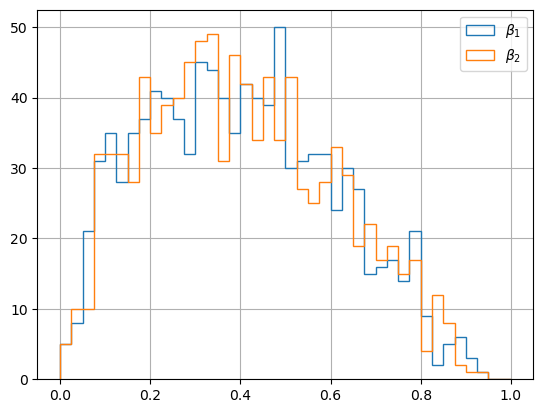

In [14]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        # x_index = bisect.bisect_left(sample, x[i])  # -- what is that???
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

def get_max_dCdf(f1, f2):
    f1_std = (f1 - f1.mean()) / f1.std()
    f2_std = (f2 - f2.mean()) / f2.std()
    f1_std.sort()
    f2_std.sort()

    xmin = min(f1.min(), f2.min())
    xmin = round(xmin) - 1
    xmax = max(f1.max(), f2.max())
    xmax = round(xmax) + 1
    print(f'xmin: {xmin}, xmax: {xmax}')

    x = np.linspace(xmin, xmax, 100+1)

    f1_std_cdf = cdf(f1, x)
    f2_std_cdf = cdf(f2, x)

    max_diff = np.max(np.abs(f1_std_cdf - f2_std_cdf))
    return max_diff


N1 = 1000  # F1 distribution (known)
# N2 = 100   # F2 distribution (to test)
N2 = 1000   # F2 distribution (to test)

stats.beta.random_state = 1  # seed

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

print(f'beta1: a1: {a1}, b1: {b1}')
print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

# a2 = 2
# b2 = 5
a2 = a1
b2 = b1
beta2 = stats.beta.rvs(a2, b2, size=N2)
mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

print(f'beta2: a2: {a2}, b2:{b2}')
print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')

bins = np.linspace(0, 1, 40+1)
plt.figure()
plt.hist(beta1, bins=bins, histtype='step', label=r'$\beta_1$')
plt.hist(beta2, bins=bins, histtype='step', label=r'$\beta_2$')
plt.legend()
plt.grid()

max_diff = get_max_dCdf(beta1, beta2)
print(f'max_diff: {max_diff}')

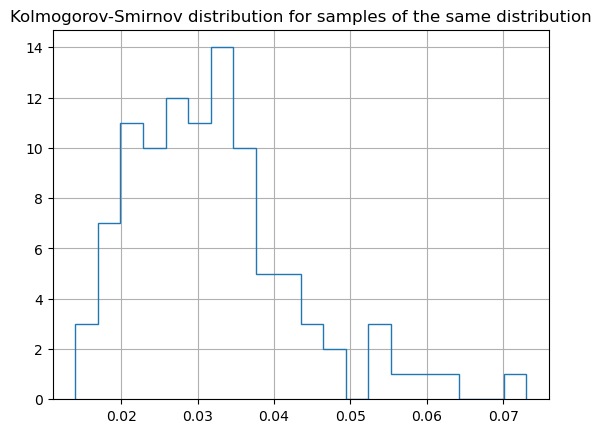

In [15]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

def get_max_dCdf(f1, f2):
    f1_std = (f1 - f1.mean()) / f1.std()
    f2_std = (f2 - f2.mean()) / f2.std()
    f1_std.sort()
    f2_std.sort()

    xmin = min(f1.min(), f2.min())
    xmin = round(xmin) - 1
    xmax = max(f1.max(), f2.max())
    xmax = round(xmax) + 1
    # print(f'xmin: {xmin}, xmax: {xmax}')

    x = np.linspace(xmin, xmax, 100+1)

    f1_std_cdf = cdf(f1, x)
    f2_std_cdf = cdf(f2, x)

    max_diff = np.max(np.abs(f1_std_cdf - f2_std_cdf))
    return max_diff


ntry = 100
max_diffs = []
for i in range(ntry):
    N1 = 1000  # F1 distribution (known)
    # N2 = 100   # F2 distribution (to test)
    N2 = 1000   # F2 distribution (to test)

    stats.beta.random_state = i  # set a seed for every iteration

    a1 = 2
    b1 = 3
    beta1 = stats.beta.rvs(a1, b1, size=N1)
    mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

    # print(f'beta1: a1: {a1}, b1: {b1}')
    # print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

    # a2 = 2
    # b2 = 5
    a2 = a1
    b2 = b1
    beta2 = stats.beta.rvs(a2, b2, size=N2)
    mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

    # print(f'beta2: a2: {a2}, b2:{b2}')
    # print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')
    
    max_diff = get_max_dCdf(beta1, beta2)
    max_diffs.append(max_diff)

plt.figure()
plt.title(f'Kolmogorov-Smirnov distribution for samples of the same distribution')
plt.hist(max_diffs, bins=20, histtype='step')
plt.grid()

In [16]:
stats.mstats.kstest(beta1, beta2)

KstestResult(statistic=0.03, pvalue=0.7593695685682871, statistic_location=0.6379893501103093, statistic_sign=1)

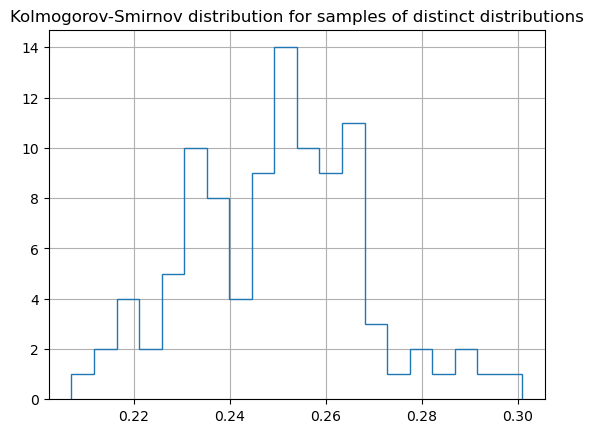

In [17]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

def get_max_dCdf(f1, f2):
    f1_std = (f1 - f1.mean()) / f1.std()
    f2_std = (f2 - f2.mean()) / f2.std()
    f1_std.sort()
    f2_std.sort()

    xmin = min(f1.min(), f2.min())
    xmin = round(xmin) - 1
    xmax = max(f1.max(), f2.max())
    xmax = round(xmax) + 1
    # print(f'xmin: {xmin}, xmax: {xmax}')

    x = np.linspace(xmin, xmax, 100+1)

    f1_std_cdf = cdf(f1, x)
    f2_std_cdf = cdf(f2, x)

    max_diff = np.max(np.abs(f1_std_cdf - f2_std_cdf))
    return max_diff


ntry = 100
max_diffs = []
for i in range(ntry):
    N1 = 1000  # F1 distribution (known)
    # N2 = 100   # F2 distribution (to test)
    N2 = 1000   # F2 distribution (to test)

    stats.beta.random_state = i  # set a seed for every iteration

    a1 = 2
    b1 = 3
    beta1 = stats.beta.rvs(a1, b1, size=N1)
    mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

    # print(f'beta1: a1: {a1}, b1: {b1}')
    # print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

    a2 = 2
    b2 = 5
    # a2 = a1
    # b2 = b1
    beta2 = stats.beta.rvs(a2, b2, size=N2)
    mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

    # print(f'beta2: a2: {a2}, b2:{b2}')
    # print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')
    
    max_diff = get_max_dCdf(beta1, beta2)
    max_diffs.append(max_diff)

plt.figure()
plt.title(f'Kolmogorov-Smirnov distribution for samples of distinct distributions')
plt.hist(max_diffs, bins=20, histtype='step')
plt.grid()

In [18]:
stats.mstats.kstest(beta1, beta2)

KstestResult(statistic=0.242, pvalue=4.2252283893369713e-26, statistic_location=0.39151369133259517, statistic_sign=-1)

## Optimize the code

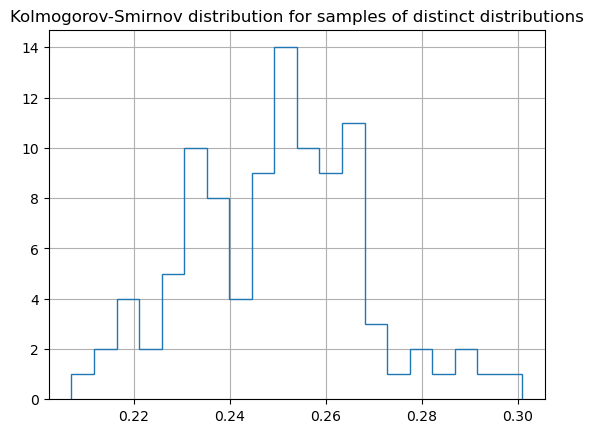

In [19]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

def get_max_dCdf(f1, f2):
    f1_std = (f1 - f1.mean()) / f1.std()
    f2_std = (f2 - f2.mean()) / f2.std()
    f1_std.sort()
    f2_std.sort()

    xmin = min(f1.min(), f2.min())
    xmin = round(xmin) - 1
    xmax = max(f1.max(), f2.max())
    xmax = round(xmax) + 1
    # print(f'xmin: {xmin}, xmax: {xmax}')

    x = np.linspace(xmin, xmax, 100+1)

    f1_std_cdf = cdf(f1, x)
    f2_std_cdf = cdf(f2, x)

    max_diff = np.max(np.abs(f1_std_cdf - f2_std_cdf))
    return max_diff


N1 = 1000  # F1 distribution (known)
# N2 = 100   # F2 distribution (to test)
N2 = 1000   # F2 distribution (to test)

ntry = 100
max_diffs = []
for i in range(ntry):
    stats.beta.random_state = i  # set a seed for every iteration

    a1 = 2
    b1 = 3
    beta1 = stats.beta.rvs(a1, b1, size=N1)
    mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')

    # print(f'beta1: a1: {a1}, b1: {b1}')
    # print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')

    a2 = 2
    b2 = 5
    # a2 = a1
    # b2 = b1
    beta2 = stats.beta.rvs(a2, b2, size=N2)
    mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')

    # print(f'beta2: a2: {a2}, b2:{b2}')
    # print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')
    
    max_diff = get_max_dCdf(beta1, beta2)
    max_diffs.append(max_diff)

plt.figure()
plt.title(f'Kolmogorov-Smirnov distribution for samples of distinct distributions')
plt.hist(max_diffs, bins=20, histtype='step')
plt.grid()

In [20]:
stats.mstats.kstest(beta1, beta2)

KstestResult(statistic=0.242, pvalue=4.2252283893369713e-26, statistic_location=0.39151369133259517, statistic_sign=-1)

In [21]:
stats.mstats.kstest(beta1_std, beta2_std)

KstestResult(statistic=0.039, pvalue=0.43260886958153144, statistic_location=0.337994949662511, statistic_sign=-1)

In [22]:
round1 = round
round1(3.14159, ndigits=2)

3.14

In [23]:
round(-3.14)

-3

In [24]:
x = 0
np.sum(beta1_std_sort < x) / len(beta1_std_sort)

0.514

In [25]:
beta2[:10]

array([0.33205099, 0.54488047, 0.08079844, 0.10396306, 0.39120543,
       0.25366412, 0.60741312, 0.35704208, 0.13761732, 0.59130117])

In [26]:
# KS Distribution depends on the parameter en

en = (N1 * N2) / (N1 + N2)
print(f'en: {en}')

en: 500.0


In [27]:
type(beta2)

numpy.ndarray

In [28]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.sum(sample <= x)
    cdf /= len(sample)
    return cdf

In [29]:
cdf(beta2, 0.4, True)

0.737

# Normality KS test (1-sample test): compare with Normal Distribution

### Kolmogorov-Smirnov two-sided test staticstic distribution.

This is the distribution of the two-sided Kolmogorov-Smirnov (KS) statistic $D_n$ for a finite sample size 
$n >= 1$ (the shape parameter).  

$D_n$ is given by  

$$
D_n = sup_x |F_n(x) - F(x)|
$$

where $F$ is a (continuous) CDF and $F_n$ is an empirical CDF.  

Method kstwo describes the distribution under the null hypothesis of the KS test that the empirical CDF 
corresponds to $n$ i.i.d. random variables with CDF $F$.  

i.i.d. stands for Independent Identically Distributed random numbers.  

mean: 0.25919311741299306, var: 0.006375656177652664, skew: 0.8163737679061124, kurt: 0.6994950420996826


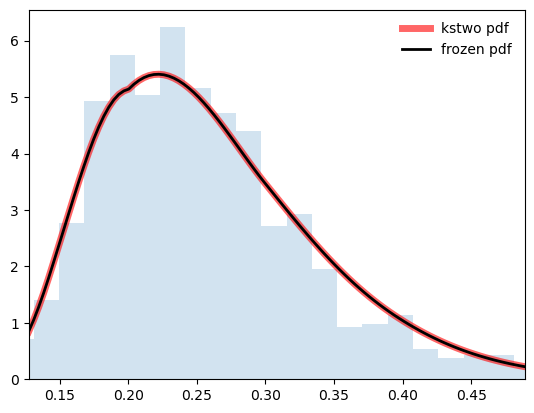

In [31]:
# https://scipy.github.io/devdocs/reference/generated/scipy.stats.kstwo.html#scipy.stats.kstwo

import numpy as np
from scipy.stats import kstwo
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Calculate the first four moments:

n = 10
mean, var, skew, kurt = kstwo.stats(n, moments='mvsk')
print(f'mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}')

# Display the probability density function (pdf):

x = np.linspace(kstwo.ppf(0.01, n),
                kstwo.ppf(0.99, n), 100)

ax.plot(x, kstwo.pdf(x, n),
       'r-', lw=5, alpha=0.6, label='kstwo pdf')

# Alternatively, the distribution object can be called (as a function)
# to fix the shape, location and scale parameters. This returns
# a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:

rv = kstwo(n)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:

vals = kstwo.ppf([0.001, 0.5, 0.999], n)
np.allclose([0.001, 0.5, 0.999], kstwo.cdf(vals, n))

#--Output: True

# Generate random numbers:

r = kstwo.rvs(n, size=1000)

# And compare the histogram:

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)


In [32]:
print(f'kstwo.ppf(0.01, 10): {kstwo.ppf(0.05, 10)}, kstwo.ppf(0.95, 10): {kstwo.ppf(0.95, 10)}')
print(f'kstwo.ppf(0.01, 10): {kstwo.ppf(0.01, 10)}, kstwo.ppf(0.99, 10): {kstwo.ppf(0.99, 10)}')

kstwo.ppf(0.01, 10): 0.15159304480716457, kstwo.ppf(0.95, 10): 0.40924608477750496
kstwo.ppf(0.01, 10): 0.1272582296994841, kstwo.ppf(0.99, 10): 0.48893165941109323


In [33]:
import scipy.stats

scipy.stats.norm.ppf(0.95, 0, 1)

1.6448536269514722

mean: 10.0, var: 1.0, skew: 0.0, kurt: 0.0
scipy.stats.norm.ppf(0.01, 10): 7.673652125959159, scipy.stats.norm.ppf(0.99, 10): 12.326347874040842


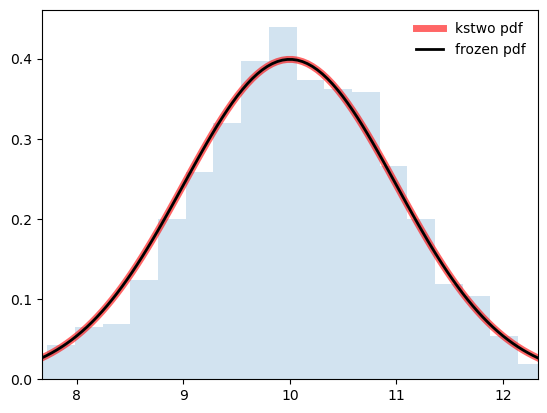

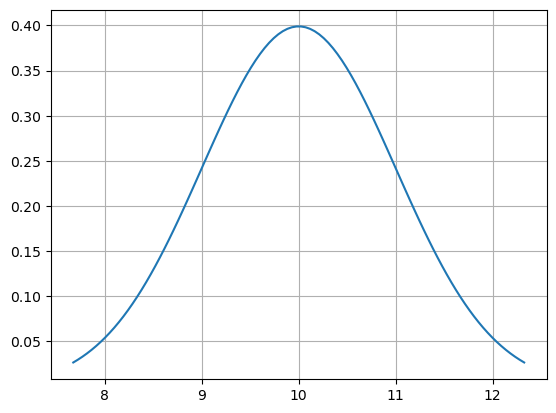

In [34]:
# https://scipy.github.io/devdocs/reference/generated/scipy.stats.kstwo.html#scipy.stats.kstwo

############################################
#
# AZ: I replaced kstwo by scipy.stats.norm
#
############################################

import numpy as np
from scipy.stats import kstwo
import scipy.stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Calculate the first four moments:

n = 10
mean, var, skew, kurt = scipy.stats.norm.stats(n, moments='mvsk')
print(f'mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}')

# Display the probability density function (pdf):

# x1 = scipy.stats.norm.ppf(0.01, n)
# x2 = scipy.stats.norm.ppf(0.99, n)
# print(f'x1: {x1}, x2: {x2}')
# x = np.linspace(x1, x2, 100)

x = np.linspace(scipy.stats.norm.ppf(0.01, n),
                scipy.stats.norm.ppf(0.99, n), 100)

# print(f'x[:5]: {x[:5]}')
# print(f'x[-5:]: {x[-5:]}')

print(f'scipy.stats.norm.ppf(0.01, {n}): {scipy.stats.norm.ppf(0.01, n)}, scipy.stats.norm.ppf(0.99, {n}): {scipy.stats.norm.ppf(0.99, n)}')

ax.plot(x, scipy.stats.norm.pdf(x, n),
       'r-', lw=5, alpha=0.6, label='kstwo pdf')

# Alternatively, the distribution object can be called (as a function)
# to fix the shape, location and scale parameters. This returns
# a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:

rv = scipy.stats.norm(n)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:

vals = scipy.stats.norm.ppf([0.001, 0.5, 0.999], n)
np.allclose([0.001, 0.5, 0.999], scipy.stats.norm.cdf(vals, n))

# Generate random numbers:

#
# fix the seed
#
### scipy.stats.norm.random_state = 1  # seed

r = scipy.stats.norm.rvs(n, size=1000, random_state=1)  # fix the random_state

# And compare the histogram:

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)

fig = plt.figure()
plt.plot(x, rv.pdf(x))
plt.grid()


In [35]:
# n = 10
x1 = scipy.stats.norm.ppf(0.01, 0)
x2 = scipy.stats.norm.ppf(0.01, 10)
x2 = scipy.stats.norm.ppf(0.01, 10)
print(f'x1: {x1}, x2: {x2}')

print(f'scipy.stats.norm.ppf(0.01, 0): {scipy.stats.norm.ppf(0.01, 0)}')
print(f'scipy.stats.norm.ppf(0.01, 10): {scipy.stats.norm.ppf(0.01, 10)}')

x1: -2.3263478740408408, x2: 7.673652125959159
scipy.stats.norm.ppf(0.01, 0): -2.3263478740408408
scipy.stats.norm.ppf(0.01, 10): 7.673652125959159


In [36]:
print(f'scipy.stats.norm.ppf(0.95, 0, 1): {scipy.stats.norm.ppf(0.95, 0, 1)}')
# print(f'scipy.stats.norm.ppf(0.95, 0, 10): {scipy.stats.norm.ppf(0.95, 0, 10)}')

print(f'scipy.stats.norm.ppf(0.95, 172.7815, 4.1532): {scipy.stats.norm.ppf(0.95, 172.7815, 4.1532)}')
print(f'scipy.stats.norm.ppf(0.95, 0, 4.1532): {scipy.stats.norm.ppf(0.95, 0, 4.1532)}')
print(f'scipy.stats.norm.ppf(0.95, 0, 1): {scipy.stats.norm.ppf(0.95, 0, 1)}')

scipy.stats.norm.ppf(0.95, 0, 1): 1.6448536269514722
scipy.stats.norm.ppf(0.95, 172.7815, 4.1532): 179.61290608345485
scipy.stats.norm.ppf(0.95, 0, 4.1532): 6.831406083454854
scipy.stats.norm.ppf(0.95, 0, 1): 1.6448536269514722


In [37]:
np.allclose([0.01, 1/3, 2/3], [0.01, 1/3, 2*(1/3)])  # compares two arrays/lists

True

# The article

https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # NumPy sort sorts in place

    # Counts how many observations are below x
    cdf = sum(sample <= x)

    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

In [40]:
def standardize(sample):
    # Standardize the data
    mean = sample.mean()
    std = sample.std()
    sample_z = (sample - mean) / std
    
    return sample_z

def ks_norm(sample):
    
    sample.sort()
    
    # Evaluates the KS statistic

    D_ks = [] # KS Statistic list
    for x in sample:
        cdf_normal = stats.norm.cdf(x=x, loc=0, scale=1)
        cdf_sample = cdf(sample=sample, x=x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    
    ks_stat = max(D_ks)  # AZ: you don't need an array D_ks to get the max
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [41]:
# Create random samples
norm_a = np.random.normal(loc = 0, scale = 1, size = 500)
norm_b = np.random.normal(loc = 0.1, scale = 1, size = 500)
norm_c = np.random.normal(loc = 3, scale = 1, size = 500)
f_a = np.random.f(dfnum = 5, dfden  = 10, size = 500)  # kind off arbitrary Fischer distribution as just not-normal

In [42]:
norm_a.sort()
norm_b.sort()
norm_c.sort()
f_a.sort()

/Users/zatserkl/anaconda3/envs/bayes/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zatserkl/anaconda3/envs/bayes/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zatserkl/anaconda3/envs/bayes/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zatserkl/anaconda3/envs/bayes/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

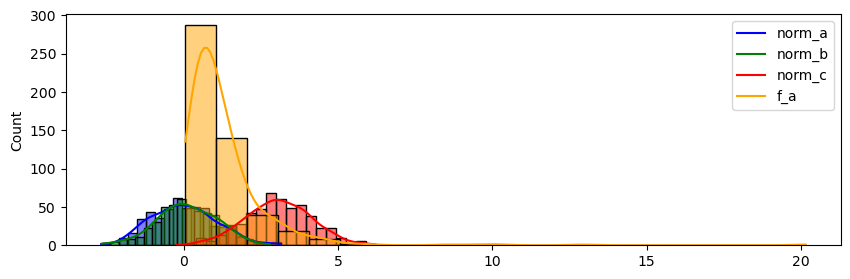

In [43]:
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(norm_a, bins = 20, kde = True, color = 'b')
sns.histplot(norm_b, bins = 20, kde = True, color = 'g')
sns.histplot(norm_c, bins = 20, kde = True, color = 'r')
sns.histplot(f_a, bins = 20, kde = True, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

In [44]:
# Calculates the KS statistic
# We wish to test for normality, so we want to compare to a normal distribution with mean = 0 and variance = 1.
# We need then to standardize the data. If we don't do that, a normal distribution with other mean or variance will fail the test.

# NB: ks_norm_a and others are dictionaris
ks_norm_a = ks_norm(standardize(norm_a))
ks_norm_b = ks_norm(standardize(norm_b))
ks_norm_c = ks_norm(standardize(norm_c))
ks_f_a = ks_norm(standardize(f_a))

In [45]:
# Prints the result
print(f"norm_a: ks = {ks_norm_a['ks_stat']:.4f} (p-value = {ks_norm_a['p_value']:.3e}, is normal = {ks_norm_a['p_value'] > 0.05})")
print(f"norm_b: ks = {ks_norm_b['ks_stat']:.4f} (p-value = {ks_norm_b['p_value']:.3e}, is normal = {ks_norm_b['p_value'] > 0.05})")
print(f"norm_c: ks = {ks_norm_c['ks_stat']:.4f} (p-value = {ks_norm_c['p_value']:.3e}, is normal = {ks_norm_c['p_value'] > 0.05})")
print(f"F_a: ks = {ks_f_a['ks_stat']:.4f} (p-value = {ks_f_a['p_value']:.3e}, is normal = {ks_f_a['p_value'] > 0.05})")

norm_a: ks = 0.0296 (p-value = 7.623e-01, is normal = True)
norm_b: ks = 0.0267 (p-value = 8.597e-01, is normal = True)
norm_c: ks = 0.0200 (p-value = 9.860e-01, is normal = True)
F_a: ks = 0.2127 (p-value = 2.542e-20, is normal = False)


In [46]:
43 / 3.785

11.360634081902246

# Build CDF for small sample

beta1.shape: (1000,)


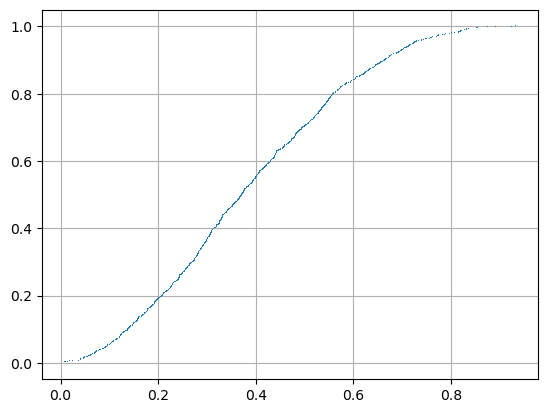

In [53]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

# generate the sample

N1 = 1000  # F1 distribution (known)
# # N2 = 100   # F2 distribution (to test)
# N2 = 1000   # F2 distribution (to test)

### ntry = 100
### max_diffs = []
### for i in range(ntry):
###     stats.beta.random_state = i  # set a seed for every iteration
### 
###     a1 = 2
###     b1 = 3
###     beta1 = stats.beta.rvs(a1, b1, size=N1)
###     mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')
### 
###     # print(f'beta1: a1: {a1}, b1: {b1}')
###     # print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')
### 
###     a2 = 2
###     b2 = 5
###     # a2 = a1
###     # b2 = b1
###     beta2 = stats.beta.rvs(a2, b2, size=N2)
###     mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')
### 
###     # print(f'beta2: a2: {a2}, b2:{b2}')
###     # print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')
###     
###     max_diff = get_max_dCdf(beta1, beta2)
###     max_diffs.append(max_diff)
### 
### plt.figure()
### plt.title(f'Kolmogorov-Smirnov distribution for samples of distinct distributions')
### plt.hist(max_diffs, bins=20, histtype='step')
### plt.grid()

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
print(f'beta1.shape: {beta1.shape}')

beta1_sort = beta1[:]
beta1_sort.sort()

beta1_sort_cdf = cdf(beta1_sort, beta1_sort)

plt.figure()
plt.plot(beta1_sort, beta1_sort_cdf, ',')
plt.grid()

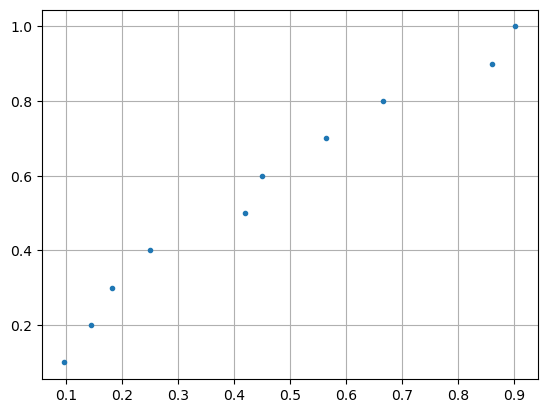

In [55]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

# generate the sample

N1 = 10  # F1 distribution (known)

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)

beta1_sort = beta1[:]
beta1_sort.sort()

beta1_sort_cdf = cdf(beta1_sort, beta1_sort)

plt.figure()
plt.plot(beta1_sort, beta1_sort_cdf, '.')
plt.grid()

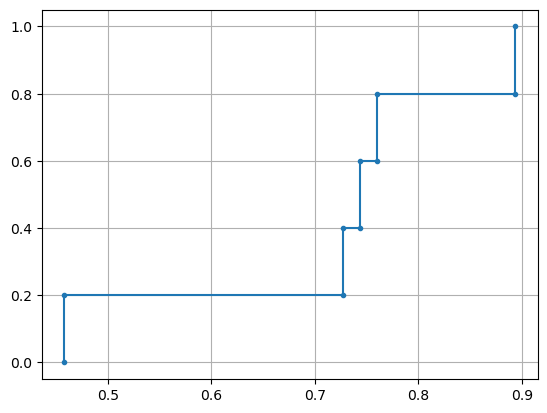

In [66]:
def cdf(sample, x, sort=False):
    if sort:
        sample.sort()  # sorts in place

    cdf = np.zeros(len(x))
    for i in range(len(x)):
        cdf[i] = np.sum(sample <= x[i])

    cdf /= len(sample)
    return cdf

def plot_cdf(sample_sort, cdf):
    # cdf_x is a sorted sample
    x_plot = np.empty(2 * len(cdf))
    y_plot = np.empty(2 * len(cdf))          # the same dimension as sample_sort

    prev = 0
    for i in range(len(cdf)):
        x_plot[2*i] = x_plot[2*i + 1] = sample_sort[i]
        y_plot[2*i] = prev
        prev = y_plot[2*i + 1] = cdf[i]

    plt.figure()
    plt.plot(x_plot, y_plot, '.-')
    plt.grid()

def cdf_step(x_cdf, y_cdf):
    # x_cdf is a sorted sample
    x_step = np.empty(2 * len(y_cdf))
    y_step = np.empty(2 * len(y_cdf))          # the same dimension as x_cdf

    prev = 0
    for i in range(len(y_cdf)):
        x_step[2*i] = x_step[2*i + 1] = x_cdf[i]
        y_step[2*i] = prev
        prev = y_step[2*i + 1] = y_cdf[i]

    return x_step, y_step

# generate the sample

# N1 = 100
N1 = 5

a1 = 2
b1 = 3
seed = 1
beta1 = stats.beta.rvs(a1, b1, size=N1, random_state=seed)

beta1_sort = beta1[:]
beta1_sort.sort()

beta1_sort_cdf = cdf(beta1_sort, beta1_sort)

x_step, y_step = cdf_step(beta1_sort, beta1_sort_cdf)

plt.figure()
plt.plot(x_step, y_step, '.-')
plt.grid()

In [3]:
def prod(m):
    return (m - 1) * m * (m + 1)

prod(19)
prod(17)

for i in range(10, 20):
    print(i, prod(i))

10 990
11 1320
12 1716
13 2184
14 2730
15 3360
16 4080
17 4896
18 5814
19 6840


In [24]:
import bisect

lst = [
#   0  1  2  3  4  5  6  7  8
    1, 1, 3, 3, 3, 4, 6, 9
    ]

print(f'      0  1  2  3  4  5  6  7  8  9   1  2  3  4  5  6  7  8  9')
print(f'ind: {list(range(10))}')
print(f'lst: {lst}')
print()
print('ind:', *list(range(10)))
print('lst:', *lst)
print()

# bisect.bisect_left(lst, 3, len(lst)-1, 0)
# bisect.bisect_left(lst, 2)
print( bisect.bisect_right(lst, 3) )
print( bisect.bisect_right(lst, 0) )
print( bisect.bisect_right(lst, 1) )
print( bisect.bisect_right(lst, 2) )

print('\nloop for bisect.bisect_right(lst, i)\n')
for i in range(10+1):
    print(f'{i:<3} {bisect.bisect_right(lst, i)}')

      0  1  2  3  4  5  6  7  8  9   1  2  3  4  5  6  7  8  9
ind: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst: [1, 1, 3, 3, 3, 4, 6, 9]

ind: 0 1 2 3 4 5 6 7 8 9
lst: 1 1 3 3 3 4 6 9

5
0
2
2

loop for bisect.bisect_right(lst, i)

0   0
1   2
2   2
3   5
4   6
5   6
6   7
7   7
8   7
9   8
10  8


In [26]:
###################################################################################################################
#
#   While it works, it's better to use np,cumsum(lst, dtype=float)  # dtype=float is optional, but natural here
#
###################################################################################################################

import bisect

lst = [
#   0  1  2  3  4  5  6  7  8
    1, 1, 3, 3, 3, 4, 6, 9
    ]

print(f'      0  1  2  3  4  5  6  7  8  9   1  2  3  4  5  6  7  8  9')
print(f'ind: {list(range(10))}')
print(f'lst: {lst}')
print()
print('ind:', *list(range(10)))
print('lst:', *lst)
print()

# bisect.bisect_left(lst, 3, len(lst)-1, 0)
# bisect.bisect_left(lst, 2)
print( bisect.bisect_right(lst, 3) )
print( bisect.bisect_right(lst, 0) )
print( bisect.bisect_right(lst, 1) )
print( bisect.bisect_right(lst, 2) )

print('\nloop for bisect.bisect_right(lst, i)\n')
for i in range(10+1):
    print(f'{i:<3} {bisect.bisect_right(lst, i)}')

      0  1  2  3  4  5  6  7  8  9   1  2  3  4  5  6  7  8  9
ind: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst: [1, 1, 3, 3, 3, 4, 6, 9]

ind: 0 1 2 3 4 5 6 7 8 9
lst: 1 1 3 3 3 4 6 9

5
0
2
2

loop for bisect.bisect_right(lst, i)

0   0
1   2
2   2
3   5
4   6
5   6
6   7
7   7
8   7
9   8
10  8


In [15]:
import bisect

def cdf(sample, x, sort=False):
    if sort:
        sample.sort()
    return bisect.bisect_right(sample, x) / len(sample)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import bisect

beta1.shape: (1000,)


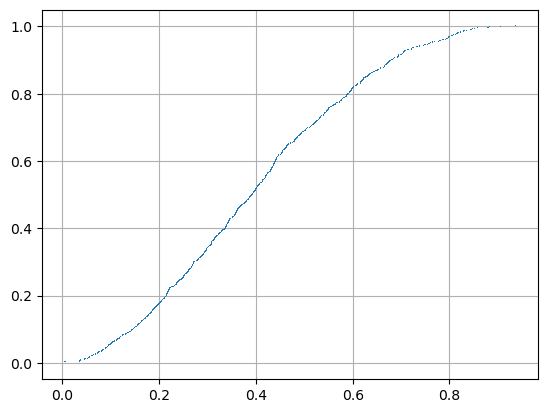

In [47]:
### def cdf(sample, x, sort=False):
###     if sort:
###         sample.sort()
###     return bisect.bisect_right(sample, x) / len(sample)

def cdf(sample, x_cdf, sort=False):
    if sort:
        sample.sort()
    
    y_cdf = np.zeros(len(x_cdf))
    for i in range(len(x_cdf)):
        y_cdf[i] = bisect.bisect_right(sample, x_cdf[i])
    
    return y_cdf / len(sample)

# def cdf(sample, x, sort=False):
#     if sort:
#         sample.sort()  # sorts in place
# 
#     cdf = np.zeros(len(x))
#     for i in range(len(x)):
#         cdf[i] = np.sum(sample <= x[i])
# 
#     cdf /= len(sample)
#     return cdf

# generate the sample

N1 = 1000  # F1 distribution (known)
# # N2 = 100   # F2 distribution (to test)
# N2 = 1000   # F2 distribution (to test)

### ntry = 100
### max_diffs = []
### for i in range(ntry):
###     stats.beta.random_state = i  # set a seed for every iteration
### 
###     a1 = 2
###     b1 = 3
###     beta1 = stats.beta.rvs(a1, b1, size=N1)
###     mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')
### 
###     # print(f'beta1: a1: {a1}, b1: {b1}')
###     # print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')
### 
###     a2 = 2
###     b2 = 5
###     # a2 = a1
###     # b2 = b1
###     beta2 = stats.beta.rvs(a2, b2, size=N2)
###     mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')
### 
###     # print(f'beta2: a2: {a2}, b2:{b2}')
###     # print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')
###     
###     max_diff = get_max_dCdf(beta1, beta2)
###     max_diffs.append(max_diff)
### 
### plt.figure()
### plt.title(f'Kolmogorov-Smirnov distribution for samples of distinct distributions')
### plt.hist(max_diffs, bins=20, histtype='step')
### plt.grid()

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
print(f'beta1.shape: {beta1.shape}')

# beta1_sort = np.copy(beta1)
beta1_sort = beta1.copy()
beta1_sort.sort()

beta1_sort_cdf = cdf(beta1_sort, beta1_sort)

plt.figure()
plt.plot(beta1_sort, beta1_sort_cdf, ',')
plt.grid()

beta1.shape: (1000,)


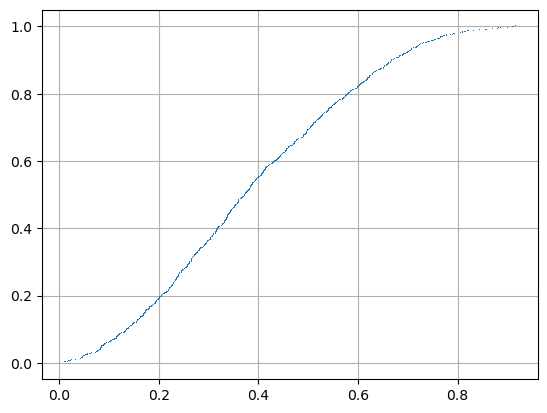

In [46]:
def cdf(sample):
    y_cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        y_cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return y_cdf / len(sample)

# def cdf(sample, x, sort=False):
#     if sort:
#         sample.sort()  # sorts in place
# 
#     cdf = np.zeros(len(x))
#     for i in range(len(x)):
#         cdf[i] = np.sum(sample <= x[i])
# 
#     cdf /= len(sample)
#     return cdf

# generate the sample

N1 = 1000  # F1 distribution (known)
# # N2 = 100   # F2 distribution (to test)
# N2 = 1000   # F2 distribution (to test)

### ntry = 100
### max_diffs = []
### for i in range(ntry):
###     stats.beta.random_state = i  # set a seed for every iteration
### 
###     a1 = 2
###     b1 = 3
###     beta1 = stats.beta.rvs(a1, b1, size=N1)
###     mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')
### 
###     # print(f'beta1: a1: {a1}, b1: {b1}')
###     # print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')
### 
###     a2 = 2
###     b2 = 5
###     # a2 = a1
###     # b2 = b1
###     beta2 = stats.beta.rvs(a2, b2, size=N2)
###     mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')
### 
###     # print(f'beta2: a2: {a2}, b2:{b2}')
###     # print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')
###     
###     max_diff = get_max_dCdf(beta1, beta2)
###     max_diffs.append(max_diff)
### 
### plt.figure()
### plt.title(f'Kolmogorov-Smirnov distribution for samples of distinct distributions')
### plt.hist(max_diffs, bins=20, histtype='step')
### plt.grid()

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
print(f'beta1.shape: {beta1.shape}')

beta1_sort = beta1.copy()
beta1_sort.sort()

beta1_sort_cdf = cdf(beta1_sort)

plt.figure()
plt.plot(beta1_sort, beta1_sort_cdf, ',')
plt.grid()

beta1.shape: (1000,)
beta1_sort_cdf[0]: 0.001, beta1_sort_cdf[-1]: 1.0


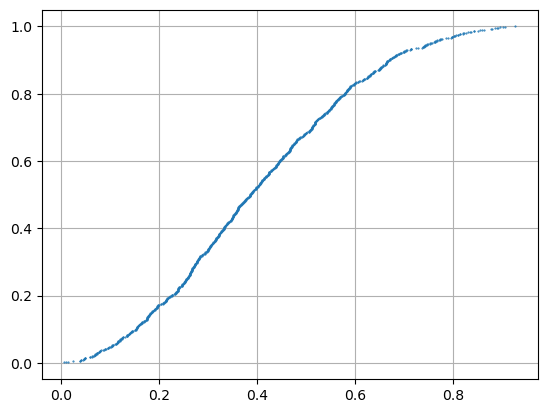

In [48]:
def cdf(sample):
    """
    The sample is supposed to be sorted
    """
    y_cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        y_cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return y_cdf / len(sample)

# generate the sample

N1 = 1000  # F1 distribution (known)
# # N2 = 100   # F2 distribution (to test)
# N2 = 1000   # F2 distribution (to test)

### ntry = 100
### max_diffs = []
### for i in range(ntry):
###     stats.beta.random_state = i  # set a seed for every iteration
### 
###     a1 = 2
###     b1 = 3
###     beta1 = stats.beta.rvs(a1, b1, size=N1)
###     mean_beta1, var_beta1, skew_beta1, kurt_beta1 = stats.beta.stats(a1, b1, moments='mvsk')
### 
###     # print(f'beta1: a1: {a1}, b1: {b1}')
###     # print(f'mean_beta1: {mean_beta1:.3f}, var_beta1: {var_beta1:.3f}, skew_beta1: {skew_beta1:.3f}, kurt_beta1: {kurt_beta1:.3f}')
### 
###     a2 = 2
###     b2 = 5
###     # a2 = a1
###     # b2 = b1
###     beta2 = stats.beta.rvs(a2, b2, size=N2)
###     mean_beta2, var_beta2, skew_beta2, kurt_beta2 = stats.beta.stats(a2, b2, moments='mvsk')
### 
###     # print(f'beta2: a2: {a2}, b2:{b2}')
###     # print(f'mean_beta2: {mean_beta2:.3f}, var_beta2: {var_beta2:.3f}, skew_beta2: {skew_beta2:.3f}, kurt_beta2: {kurt_beta2:.3f}')
###     
###     max_diff = get_max_dCdf(beta1, beta2)
###     max_diffs.append(max_diff)
### 
### plt.figure()
### plt.title(f'Kolmogorov-Smirnov distribution for samples of distinct distributions')
### plt.hist(max_diffs, bins=20, histtype='step')
### plt.grid()

a1 = 2
b1 = 3
beta1 = stats.beta.rvs(a1, b1, size=N1)
print(f'beta1.shape: {beta1.shape}')

beta1_sort = beta1.copy()
beta1_sort.sort()

beta1_sort_cdf = cdf(beta1_sort)
print(f'beta1_sort_cdf[0]: {beta1_sort_cdf[0]}, beta1_sort_cdf[-1]: {beta1_sort_cdf[-1]}')

plt.figure()
plt.plot(beta1_sort, beta1_sort_cdf, '.', markersize=1)
plt.grid()

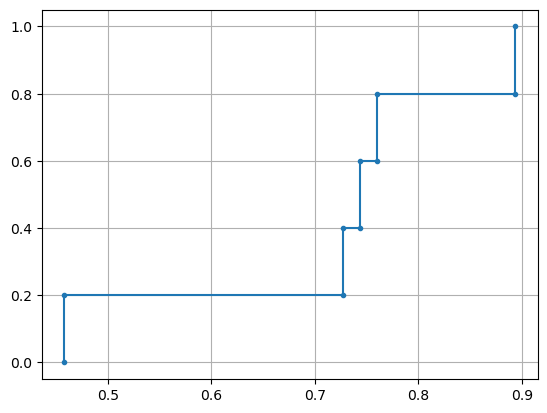

In [49]:
def cdf(sample):
    """
    The sample is supposed to be sorted
    """
    y_cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        y_cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return y_cdf / len(sample)

def cdf_step(x_cdf, y_cdf):
    # x_cdf is a sorted sample
    x_step = np.empty(2 * len(y_cdf))
    y_step = np.empty(2 * len(y_cdf))          # the same dimension as x_cdf

    prev = 0
    for i in range(len(y_cdf)):
        x_step[2*i] = x_step[2*i + 1] = x_cdf[i]
        y_step[2*i] = prev
        prev = y_step[2*i + 1] = y_cdf[i]

    return x_step, y_step

# generate the sample

# N1 = 100
N1 = 5

a1 = 2
b1 = 3
seed = 1
beta1 = stats.beta.rvs(a1, b1, size=N1, random_state=seed)

beta1_sort = beta1.copy()
beta1_sort.sort()

beta1_sort_cdf = cdf(beta1_sort)

x_step, y_step = cdf_step(beta1_sort, beta1_sort_cdf)

plt.figure()
plt.plot(x_step, y_step, '.-')
plt.grid()

# Compare 2 samples from the same $\beta$ distribution

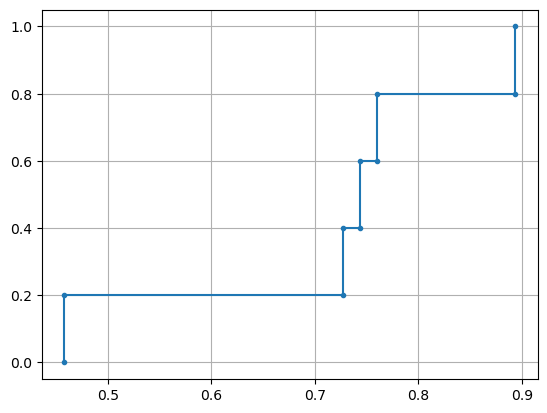

In [50]:
def cdf(sample):
    """
    Returns a CDF value for each element of the sample
    The sample is supposed to be sorted
    """
    cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return cdf / len(sample)

def cdf_step(x_cdf, y_cdf):
    """
    returns a "step" version of the cdf to plot the cdf with steps. The x_cdf is expected to be sorted.
    """
    x_step = np.empty(2 * len(y_cdf))
    y_step = np.empty(2 * len(y_cdf))          # the same dimension as x_cdf

    y_prev = 0
    for i in range(len(y_cdf)):
        x_step[2*i] = x_step[2*i + 1] = x_cdf[i]
        y_step[2*i] = y_prev
        y_prev = y_step[2*i + 1] = y_cdf[i]

    return x_step, y_step

# N1 = 100
N1 = 5

a1 = 2
b1 = 3
seed1 = 1
beta1 = stats.beta.rvs(a1, b1, size=N1, random_state=seed1)
beta1_sort = np.sort(beta1)  # returns a sorted copy

beta1_sort_cdf = cdf(beta1_sort)

x_step, y_step = cdf_step(beta1_sort, beta1_sort_cdf)

plt.figure()
plt.plot(x_step, y_step, '.-')
plt.grid()

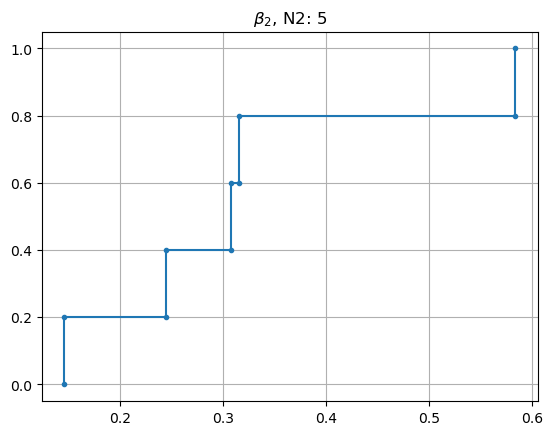

In [52]:
def cdf(sample):
    """
    Returns a CDF value for each element of the sample
    The sample is supposed to be sorted
    """
    cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return cdf / len(sample)

def cdf_step(x_cdf, y_cdf):
    """
    returns a "step" version of the cdf to plot the cdf with steps. The x_cdf is expected to be sorted.
    """
    x_step = np.empty(2 * len(y_cdf))
    y_step = np.empty(2 * len(y_cdf))          # the same dimension as x_cdf

    y_prev = 0
    for i in range(len(y_cdf)):
        x_step[2*i] = x_step[2*i + 1] = x_cdf[i]
        y_step[2*i] = y_prev
        y_prev = y_step[2*i + 1] = y_cdf[i]

    return x_step, y_step

# N2 = 100
N2 = 5

a2 = 2
b2 = 3
seed2 = 2
beta2 = stats.beta.rvs(a2, b2, size=N2, random_state=seed2)
beta2_sort = np.sort(beta2)  # returns a sorted copy

beta2_sort_cdf = cdf(beta2_sort)

x_step, y_step = cdf_step(beta2_sort, beta2_sort_cdf)

plt.figure()
plt.title(f'$\\beta_2$, N2: {N2}')
plt.plot(x_step, y_step, '.-')
plt.grid()

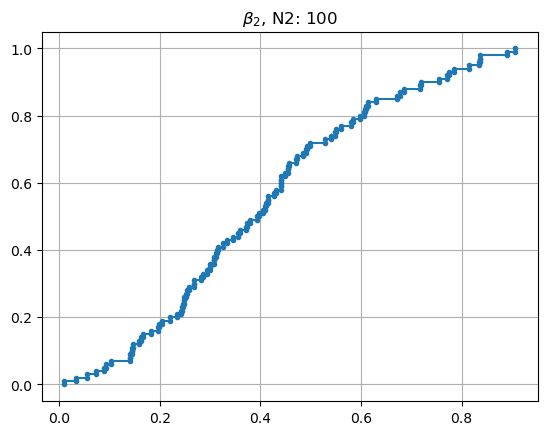

In [53]:
def cdf(sample):
    """
    Returns a CDF value for each element of the sample
    The sample is supposed to be sorted
    """
    cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return cdf / len(sample)

def cdf_step(x_cdf, y_cdf):
    """
    returns a "step" version of the cdf to plot the cdf with steps. The x_cdf is expected to be sorted.
    """
    x_step = np.empty(2 * len(y_cdf))
    y_step = np.empty(2 * len(y_cdf))          # the same dimension as x_cdf

    y_prev = 0
    for i in range(len(y_cdf)):
        x_step[2*i] = x_step[2*i + 1] = x_cdf[i]
        y_step[2*i] = y_prev
        y_prev = y_step[2*i + 1] = y_cdf[i]

    return x_step, y_step

N2 = 100
# N2 = 5

a2 = 2
b2 = 3
seed2 = 2
beta2 = stats.beta.rvs(a2, b2, size=N2, random_state=seed2)
beta2_sort = np.sort(beta2)  # returns a sorted copy

beta2_sort_cdf = cdf(beta2_sort)

x_step, y_step = cdf_step(beta2_sort, beta2_sort_cdf)

plt.figure()
plt.title(f'$\\beta_2$, N2: {N2}')
plt.plot(x_step, y_step, '.-')
plt.grid()

# Reference distribution

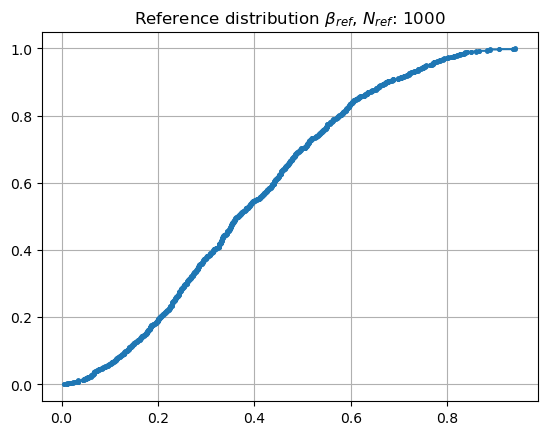

In [9]:
def cdf(sample):
    """
    Returns a CDF value for each element of the sample
    The sample is supposed to be sorted
    """
    cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return cdf / len(sample)

def cdf_step(x_cdf, y_cdf):
    """
    returns a "step" version of the cdf to plot the cdf with steps. The x_cdf is expected to be sorted.
    """
    x_step = np.empty(2 * len(y_cdf))
    y_step = np.empty(2 * len(y_cdf))          # the same dimension as x_cdf

    y_prev = 0
    for i in range(len(y_cdf)):
        x_step[2*i] = x_step[2*i + 1] = x_cdf[i]
        y_step[2*i] = y_prev
        y_prev = y_step[2*i + 1] = y_cdf[i]

    return x_step, y_step

N_ref = 1000
# N_ref = 5

a_ref = 2
b_ref = 3
seed_ref = 2
ref = stats.beta.rvs(a_ref, b_ref, size=N_ref, random_state=seed_ref)
ref_sort = np.sort(ref)  # returns a sorted copy

ref_sort_cdf = cdf(ref_sort)
# print(f'ref_sort, ref_sort_cdf:\n{ref_sort}\n{ref_sort_cdf}')

plt.figure()
plt.title(f'Reference distribution $\\beta_{{{"ref"}}}$, $N_{{{"ref"}}}$: {N_ref}')  # {{{"ref"}}}
plt.plot(*cdf_step(ref_sort, ref_sort_cdf), '.-', markersize=5)      # NB asterisk to unzip: *cdf_step()
plt.grid()

# Experimental Distribution

ref_sort, ref_sort_cdf:
[0.14553613 0.24419421 0.30758569 0.31499012 0.58396547]
[0.2 0.4 0.6 0.8 1. ]


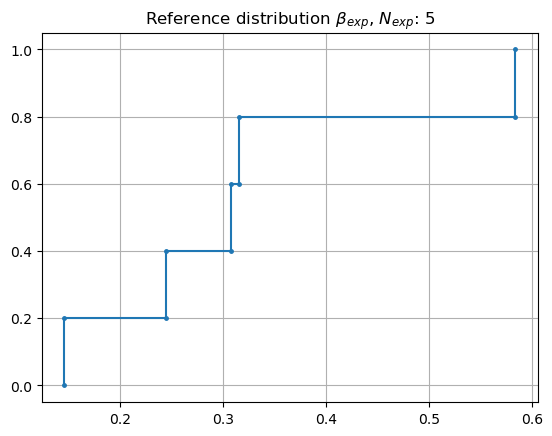

In [10]:
def cdf(sample):
    """
    Returns a CDF value for each element of the sample
    The sample is supposed to be sorted
    """
    cdf = np.zeros(len(sample))
    for i in range(len(sample)):
        cdf[i] = bisect.bisect_right(sample, sample[i])
    
    return cdf / len(sample)

def cdf_step(x_cdf, y_cdf):
    """
    returns a "step" version of the cdf to plot the cdf with steps. The x_cdf is expected to be sorted.
    """
    x_step = np.empty(2 * len(y_cdf))
    y_step = np.empty(2 * len(y_cdf))          # the same dimension as x_cdf

    y_prev = 0
    for i in range(len(y_cdf)):
        x_step[2*i] = x_step[2*i + 1] = x_cdf[i]
        y_step[2*i] = y_prev
        y_prev = y_step[2*i + 1] = y_cdf[i]

    return x_step, y_step

# Nref = 1000
N_exp = 5

a_exp = 2
b_exp = 3
seed_exp = 2
ref = stats.beta.rvs(a_exp, b_exp, size=N_exp, random_state=seed_exp)
ref_sort = np.sort(ref)  # returns a sorted copy

ref_sort_cdf = cdf(ref_sort)
print(f'ref_sort, ref_sort_cdf:\n{ref_sort}\n{ref_sort_cdf}')

plt.figure()
plt.title(f'Reference distribution $\\beta_{{{"exp"}}}$, $N_{{{"exp"}}}$: {N_exp}')  # {{{"exp"}}}
plt.plot(*cdf_step(ref_sort, ref_sort_cdf), '.-', markersize=5)      # NB asterisk to unzip: *cdf_step()
plt.grid()

# class Cdf

In [23]:
class Cdf:
    """
    CDF for our discrete samples (reference and experimental)
    """
    def __init__(self, samples):
        self.samples = np.copy(samples)     # NB: I am using here PLURAL samples instead of sample
        self.x = np.sort(self.samples)
        self.cdf = self.cdf_from_samples()

    def cdf_from_samples(self):
        """
        Returns a CDF value for each element of the sample
        The sample is supposed to be sorted
        """
        cdf = np.zeros(len(self.x))
        for i in range(len(self.x)):
            cdf[i] = bisect.bisect_right(self.x, self.x[i])

        return cdf / len(self.x)

    def cdf_step(self):
        """
        returns a "step" version of the cdf to plot the cdf with steps. The self.x is expected to be sorted.
        """
        x_step = np.empty(2 * len(self.cdf))
        y_step = np.empty(2 * len(self.cdf))

        y_prev = 0
        for i in range(len(self.cdf)):
            x_step[2*i] = x_step[2*i + 1] = self.x[i]
            y_step[2*i] = y_prev
            y_prev = y_step[2*i + 1] = self.cdf[i]

        return x_step, y_step

# Difference Reference - Experimental

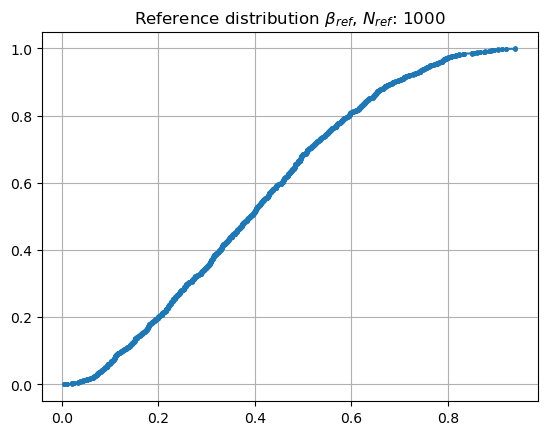

In [26]:
N_ref = 1000
# N_ref = 5

a_ref = 2
b_ref = 3
seed_ref = 1
ref = stats.beta.rvs(a_ref, b_ref, size=N_ref, random_state=seed_ref)

cdf_ref = Cdf(ref)
# print(f'cdf_ref.x, cdf_ref.cdf:\n{cdf_ref.x}\n{cdf_ref.cdf}')

plt.figure()
plt.title(f'Reference distribution $\\beta_{{{"ref"}}}$, $N_{{{"ref"}}}$: {N_ref}')  # {{{"ref"}}}
plt.plot(*cdf_ref.cdf_step(), '.-', markersize=5)      # NB asterisk to unzip: *cdf_ref.cdf_step()
plt.grid()

cdf_exp.x, cdf_exp.cdf:
[0.14553613 0.24419421 0.30758569 0.31499012 0.58396547]
[0.2 0.4 0.6 0.8 1. ]


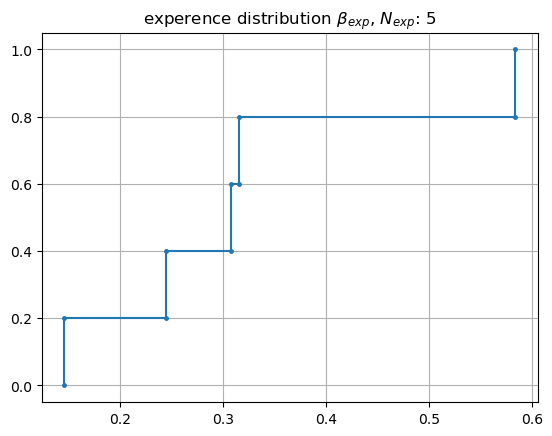

In [27]:
# N_exp = 1000
N_exp = 5

a_exp = 2
b_exp = 3
seed_exp = 2
exp = stats.beta.rvs(a_exp, b_exp, size=N_exp, random_state=seed_exp)

cdf_exp = Cdf(exp)
print(f'cdf_exp.x, cdf_exp.cdf:\n{cdf_exp.x}\n{cdf_exp.cdf}')

plt.figure()
plt.title(f'experence distribution $\\beta_{{{"exp"}}}$, $N_{{{"exp"}}}$: {N_exp}')  # {{{"exp"}}}
plt.plot(*cdf_exp.cdf_step(), '.-', markersize=5)      # NB asterisk to unzip: *cdf_exp.cdf_step()
plt.grid()

In [ ]:
class Cdf:
    """
    CDF for our discrete samples (reference and experimental)
    """
    def __init__(self, samples):
        self.samples = np.copy(samples)     # NB: I am using here PLURAL samples instead of sample
        self.x = np.sort(self.samples)
        self.cdf = self.cdf_from_samples()

    def cdf_from_samples(self):
        """
        Returns a CDF value for each element of the sample
        The sample is supposed to be sorted
        """
        cdf = np.zeros(len(self.x))
        for i in range(len(self.x)):
            cdf[i] = bisect.bisect_right(self.x, self.x[i])

        return cdf / len(self.x)

    def cdf_step(self):
        """
        returns a "step" version of the cdf to plot the cdf with steps. The self.x is expected to be sorted.
        """
        x_step = np.empty(2 * len(self.cdf))
        y_step = np.empty(2 * len(self.cdf))

        y_prev = 0
        for i in range(len(self.cdf)):
            x_step[2*i] = x_step[2*i + 1] = self.x[i]
            y_step[2*i] = y_prev
            y_prev = y_step[2*i + 1] = self.cdf[i]

        return x_step, y_step
    
    def max_diff(self, cdf):
        max_diff = 0